# Emotion Recognition in Autistic Children: A Deep Learning Benchmark and Analysis

**Author: Md. Hasibur Rahman**

---

## 1. Project Overview

This project aims to develop and evaluate deep learning models for the early recognition of emotions in children with autism. The primary goal is to create a comprehensive benchmark of various state-of-the-art and custom-designed neural network architectures to identify the most effective approaches for this specific classification task.

The project is guided by the paper title: **"Deep Learning-Based Early Emotion Recognition in Children with Autism: Dataset Insights, Model Enhancements, and Design Strategies."**

The notebook is structured as a series of independent but consistent pipelines, where each pipeline trains and evaluates a specific model architecture. This allows for a fair and direct comparison of their performance.

## 2. Dataset

The dataset used for this research is the **"Autistic Children Emotions - Dr. Fatma M. Talaat"** dataset, publicly available on Kaggle.

- **Source:** [Kaggle Dataset Link](https://www.kaggle.com/datasets/fatmamtalaat/autistic-children-emotions-dr-fatma-m-talaat/data)
- **Structure:** The dataset contains images of children's faces, categorized into six core emotions.
- **Classes (6):** `anger`, `fear`, `joy`, `Natural`, `sadness`, `surprise`.
- **Data Splits:**
    - The original "Train" folder is programmatically split into a new **Training Set (80%)** and a **Validation Set (20%)**.
    - The original "Test" folder is used as the final, unseen **Test Set** for evaluation.

## 3. Methodology

A consistent and reproducible methodology is applied across all models to ensure a fair comparison.

- **Framework:** PyTorch
- **Training Strategy:** Transfer learning is employed for all architectures. Models are initialized with pre-trained ImageNet weights, and their final classification layer is replaced to match the `6` classes of our dataset.
- **Data Augmentation:** The training dataset is augmented with random horizontal flips, rotations, and color jittering to improve model generalization and robustness. The validation and test sets are not augmented, receiving only resizing and normalization.
- **Reproducibility:** A fixed random seed (`seed=42`) is used for all operations, including data splits and model initialization, to ensure that results are consistent across runs.
- **Evaluation:** Each model is trained and its performance is tracked using the validation set. The model weights that achieve the highest validation accuracy are saved. This best-performing model is then evaluated on the hold-out test set to generate the final performance metrics.

## 4. Implemented Models

The following models are implemented and evaluated in this notebook, categorized by their architectural design.

### a. Standard CNN Benchmark Architectures
These models form the baseline for our comparative analysis.
- VGG16
- VGG19
- ResNet50
- DenseNet121
- MobileNetV2
- EfficientNetB0

### b. Advanced and Custom Architectures
These models explore more modern or enhanced designs to identify potential performance improvements.
- **Vision Transformer (ViT-B/16):** A modern, attention-based architecture that processes images as a sequence of patches.
- **RegNet_Y_8GF:** A state-of-the-art CNN designed by analyzing optimal network structures.
- **ResNet50 with SE-Attention:** The standard ResNet50 enhanced with Squeeze-and-Excitation (SE) blocks to learn channel-wise feature importance.
- **VGG16 with Attention Gates:** The standard VGG16 enhanced with spatial Attention Gates (AG) to help the model focus on the most salient regions of the face for emotion classification.

## 5. Evaluation Metrics and Outputs

For each model, a comprehensive set of evaluation metrics and visualizations is automatically generated and saved to the project directory.

- **Console Output:** Real-time progress for each training and validation epoch.
- **Saved Model:** The weights of the best-performing model (`best_model_<ModelName>.pth`).
- **Performance Plots:**
    1.  **Accuracy & Loss Curves:** `png` file showing training and validation curves over epochs.
    2.  **Classification Report:** A heatmap visualizing the per-class Precision, Recall, and F1-Score.
    3.  **Confusion Matrix:** A heatmap showing the model's predictions against the true labels for the test set.
    4.  **ROC Curves:** A plot of the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) for each class.

In [ ]:
# Prints the installed versions of Python, NumPy, and PyTorch libraries
import sys
import numpy as np
import torch
print(f"Python Version: {sys.version}")
print(f"NumPy Version: {np.__version__}")
print(f"PyTorch Version: {torch.__version__}")

# Function to check GPU availability and display memory statistics using PyTorch's CUDA interface
def check_gpu_status():
    # Check if GPU is available
    if torch.cuda.is_available():
        print(f"CUDA is available. PyTorch is using GPU.\n")
        # Get the number of available GPUs
        num_gpus = torch.cuda.device_count()
        print(f"Number of GPUs available: {num_gpus}")
        # Loop through each GPU and display its details
        for gpu_id in range(num_gpus):
            gpu_name = torch.cuda.get_device_name(gpu_id)
            gpu_memory_allocated = torch.cuda.memory_allocated(gpu_id) / (1024 ** 3)  # In GB
            gpu_memory_cached = torch.cuda.memory_reserved(gpu_id) / (1024 ** 3)      # In GB
            gpu_memory_total = torch.cuda.get_device_properties(gpu_id).total_memory / (1024 ** 3)  # In GB
            print(f"\nGPU {gpu_id}: {gpu_name}")
            print(f"  Total Memory: {gpu_memory_total:.2f} GB")
            print(f"  Memory Allocated: {gpu_memory_allocated:.2f} GB")
            print(f"  Memory Reserved (Cached): {gpu_memory_cached:.2f} GB")
    else:
        print("CUDA is not available. PyTorch is using the CPU.")

# Run the GPU status check
check_gpu_status()

Python Version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
NumPy Version: 2.0.2
PyTorch Version: 2.6.0+cu124
CUDA is available. PyTorch is using GPU.

Number of GPUs available: 1

GPU 0: Tesla T4
  Total Memory: 14.74 GB
  Memory Allocated: 0.00 GB
  Memory Reserved (Cached): 0.00 GB


In [ ]:
import os
import zipfile

# Unzip the downloaded file into a specific directory
zip_file_name = '/content/Autistic Children Emotions - Dr. Fatma M. Talaat.zip'
extract_dir = 'dataset'
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset extracted to '{extract_dir}' directory.")

Dataset extracted to 'dataset' directory.


# VGG16

Using device: cuda
Training dataset size: 606
Validation dataset size: 152
Test dataset size: 75
Classes: ['Natural', 'anger', 'fear', 'joy', 'sadness', 'surprise']
--- Training VGG16 with Batch Size: 16, LR: 0.0001, Epochs: 50 ---


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 152MB/s]


Epoch 1/50 - Training: Loss = 1.4701, Accuracy = 0.4422
Epoch 1/50 - Validation: Loss = 1.1967, Accuracy = 0.5789
Time for epoch 1: 12.32s
New best model saved with validation accuracy: 0.5789
Epoch 2/50 - Training: Loss = 1.2023, Accuracy = 0.5627
Epoch 2/50 - Validation: Loss = 1.0770, Accuracy = 0.6579
Time for epoch 2: 11.38s
New best model saved with validation accuracy: 0.6579
Epoch 3/50 - Training: Loss = 1.0802, Accuracy = 0.6254
Epoch 3/50 - Validation: Loss = 0.9698, Accuracy = 0.6382
Time for epoch 3: 11.99s
Epoch 4/50 - Training: Loss = 0.9415, Accuracy = 0.6683
Epoch 4/50 - Validation: Loss = 1.1803, Accuracy = 0.6316
Time for epoch 4: 11.84s
Epoch 5/50 - Training: Loss = 0.9107, Accuracy = 0.6634
Epoch 5/50 - Validation: Loss = 0.9515, Accuracy = 0.6579
Time for epoch 5: 12.15s
Epoch 6/50 - Training: Loss = 0.7917, Accuracy = 0.6964
Epoch 6/50 - Validation: Loss = 1.1628, Accuracy = 0.6250
Time for epoch 6: 11.48s
Epoch 7/50 - Training: Loss = 0.7989, Accuracy = 0.6766
Ep

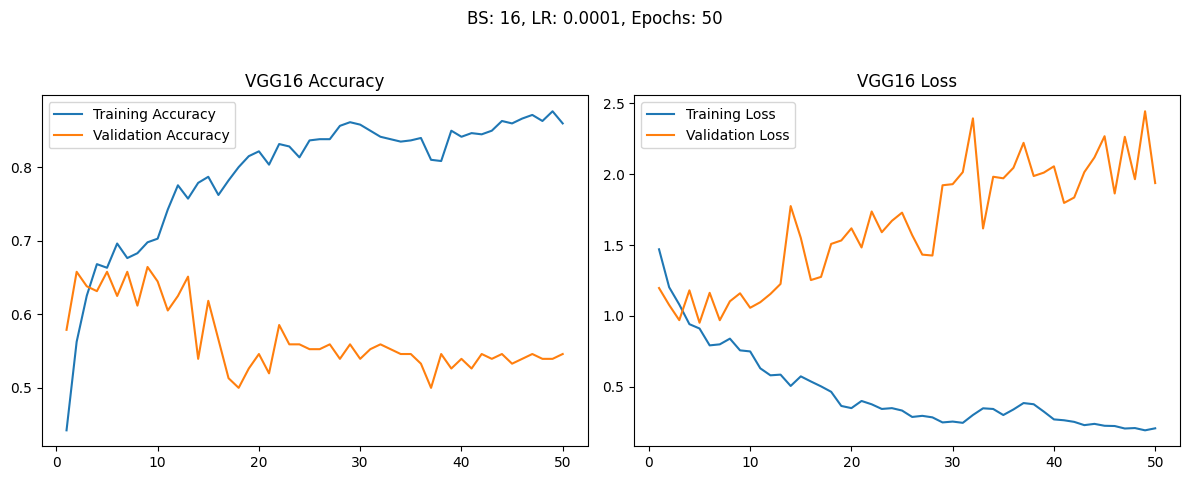

--- Testing VGG16 ---
Macro-Averaged F1 Score: 0.2519
Classification Report:
              precision    recall  f1-score   support

     Natural       0.00      0.00      0.00         7
       anger       0.00      0.00      0.00         3
        fear       0.00      0.00      0.00         3
         joy       0.85      0.98      0.91        42
     sadness       0.46      0.86      0.60        14
    surprise       0.00      0.00      0.00         6

    accuracy                           0.71        75
   macro avg       0.22      0.31      0.25        75
weighted avg       0.56      0.71      0.62        75



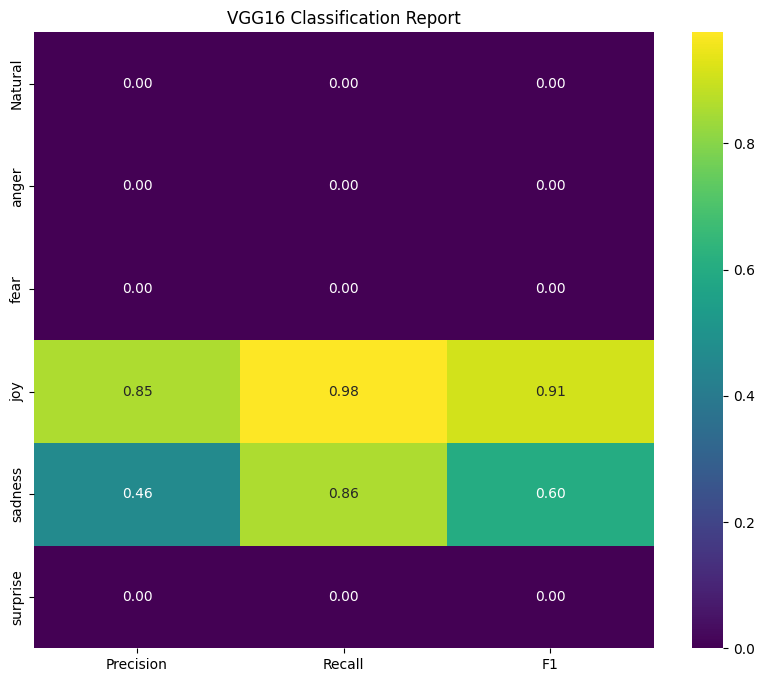

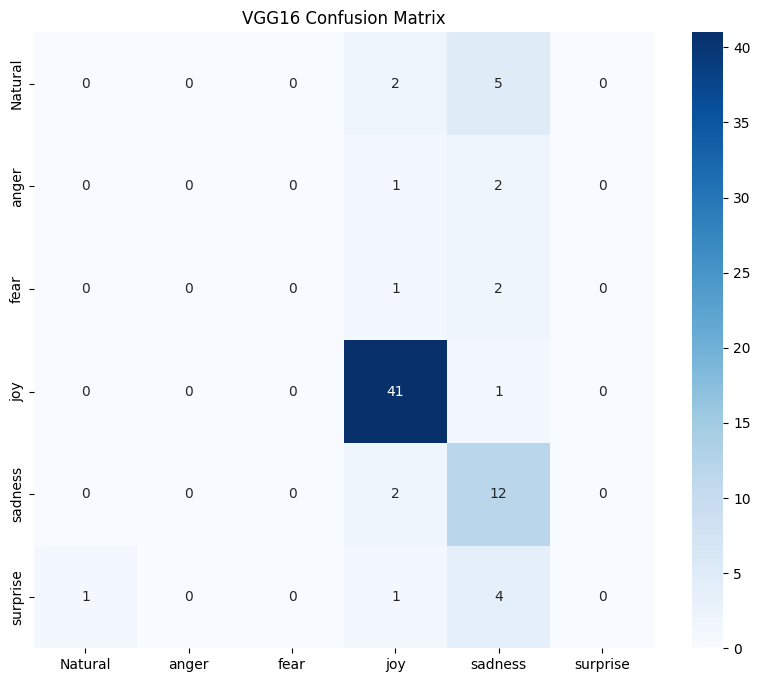

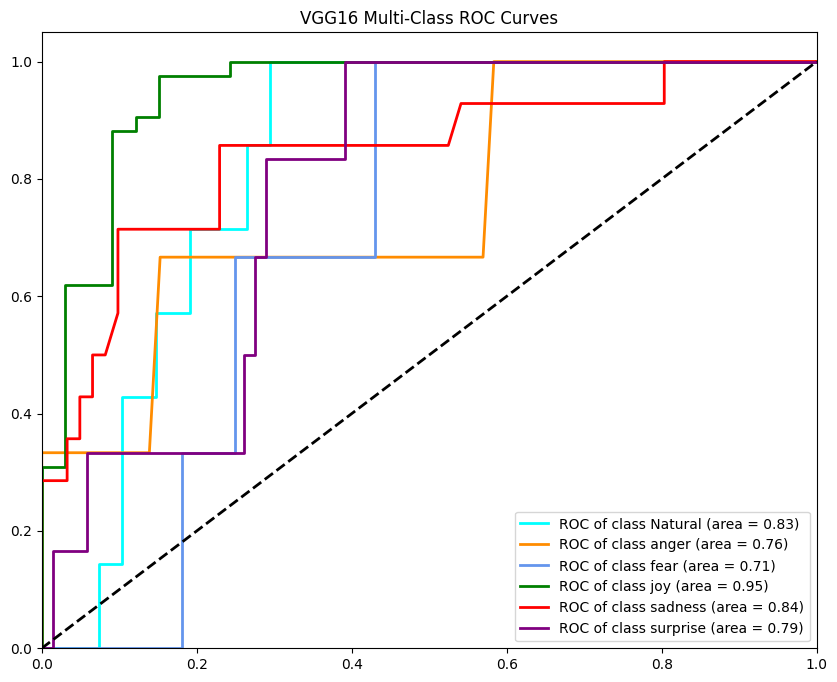

--- Training VGG16 with Batch Size: 16, LR: 0.0001, Epochs: 100 ---
Epoch 1/100 - Training: Loss = 1.5200, Accuracy = 0.4257
Epoch 1/100 - Validation: Loss = 1.4696, Accuracy = 0.5000
Time for epoch 1: 11.74s
New best model saved with validation accuracy: 0.5000
Epoch 2/100 - Training: Loss = 1.4581, Accuracy = 0.4472
Epoch 2/100 - Validation: Loss = 1.3861, Accuracy = 0.5000
Time for epoch 2: 11.82s
Epoch 3/100 - Training: Loss = 1.4464, Accuracy = 0.4356
Epoch 3/100 - Validation: Loss = 1.3836, Accuracy = 0.5000
Time for epoch 3: 11.73s
Epoch 4/100 - Training: Loss = 1.4073, Accuracy = 0.4818
Epoch 4/100 - Validation: Loss = 1.3374, Accuracy = 0.5132
Time for epoch 4: 11.79s
New best model saved with validation accuracy: 0.5132
Epoch 5/100 - Training: Loss = 1.2576, Accuracy = 0.5660
Epoch 5/100 - Validation: Loss = 1.0309, Accuracy = 0.6908
Time for epoch 5: 11.78s
New best model saved with validation accuracy: 0.6908
Epoch 6/100 - Training: Loss = 1.0498, Accuracy = 0.6452
Epoch 6/

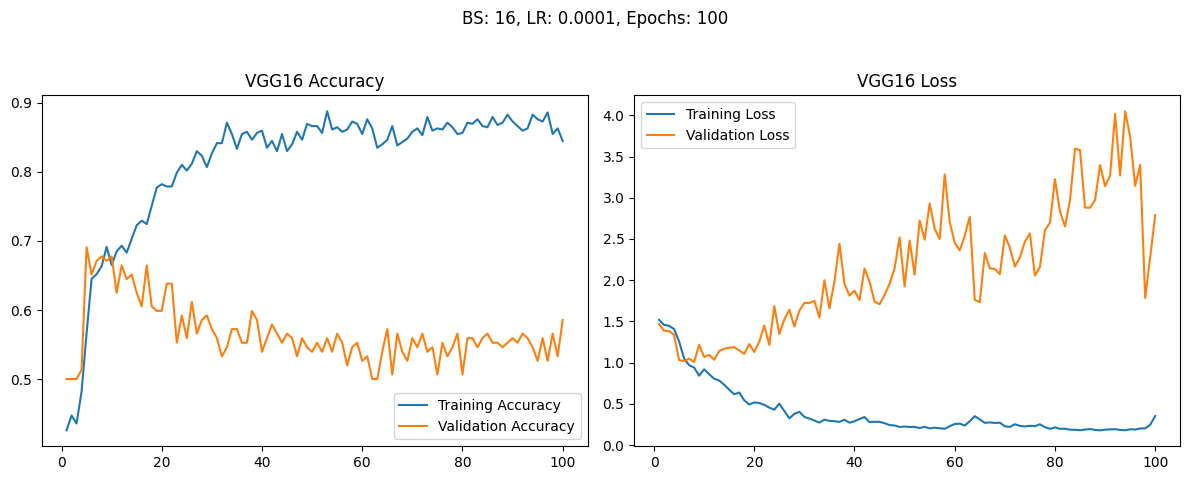

--- Testing VGG16 ---
Macro-Averaged F1 Score: 0.2389
Classification Report:
              precision    recall  f1-score   support

     Natural       0.00      0.00      0.00         7
       anger       0.00      0.00      0.00         3
        fear       0.00      0.00      0.00         3
         joy       0.75      0.98      0.85        42
     sadness       0.50      0.71      0.59        14
    surprise       0.00      0.00      0.00         6

    accuracy                           0.68        75
   macro avg       0.21      0.28      0.24        75
weighted avg       0.51      0.68      0.58        75



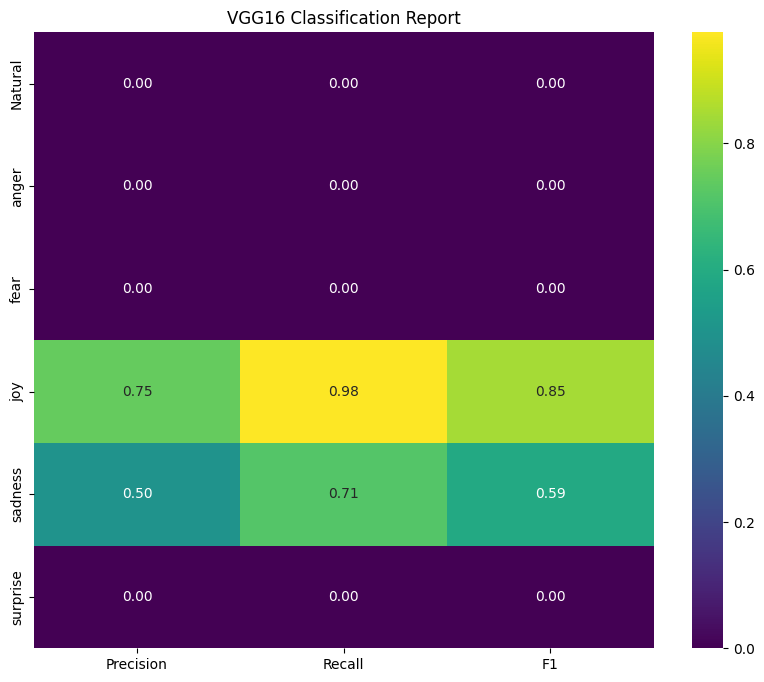

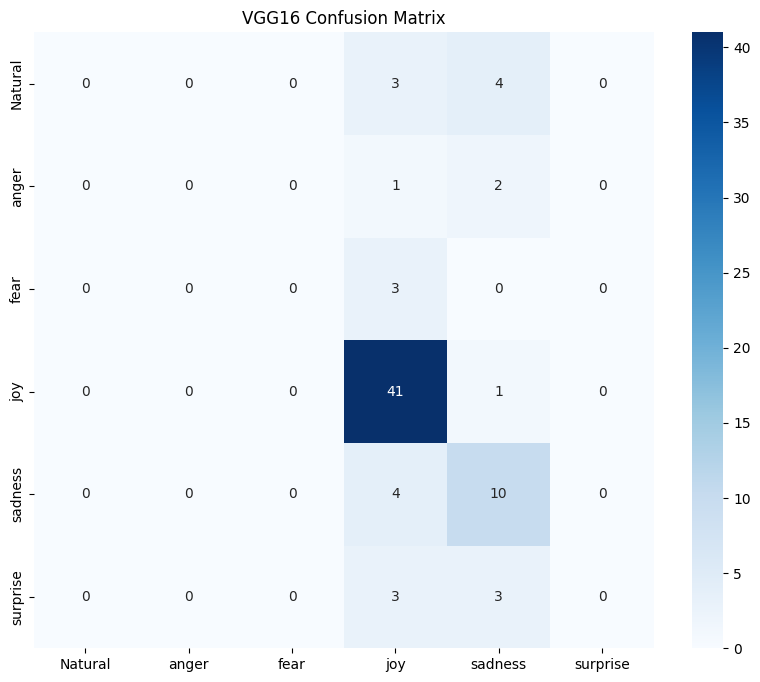

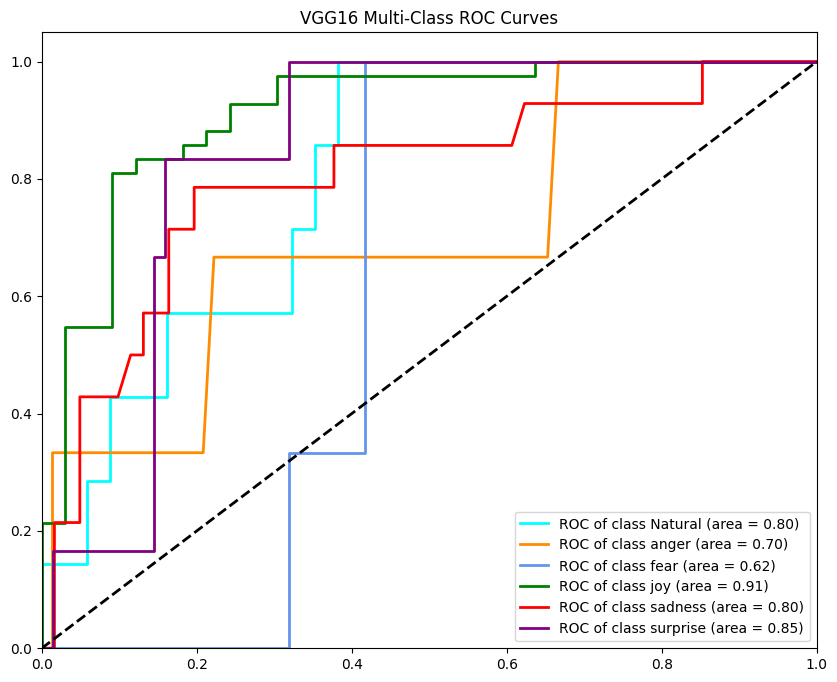

--- Training VGG16 with Batch Size: 16, LR: 0.0001, Epochs: 200 ---
Epoch 1/200 - Training: Loss = 1.4964, Accuracy = 0.4307
Epoch 1/200 - Validation: Loss = 1.2568, Accuracy = 0.5066
Time for epoch 1: 11.72s
New best model saved with validation accuracy: 0.5066
Epoch 2/200 - Training: Loss = 1.2696, Accuracy = 0.5561
Epoch 2/200 - Validation: Loss = 1.0245, Accuracy = 0.6447
Time for epoch 2: 11.82s
New best model saved with validation accuracy: 0.6447
Epoch 3/200 - Training: Loss = 1.0623, Accuracy = 0.6304
Epoch 3/200 - Validation: Loss = 1.0130, Accuracy = 0.6645
Time for epoch 3: 11.90s
New best model saved with validation accuracy: 0.6645
Epoch 4/200 - Training: Loss = 0.9788, Accuracy = 0.6535
Epoch 4/200 - Validation: Loss = 1.0042, Accuracy = 0.6711
Time for epoch 4: 11.88s
New best model saved with validation accuracy: 0.6711
Epoch 5/200 - Training: Loss = 0.9582, Accuracy = 0.6700
Epoch 5/200 - Validation: Loss = 0.9959, Accuracy = 0.6513
Time for epoch 5: 11.75s
Epoch 6/200

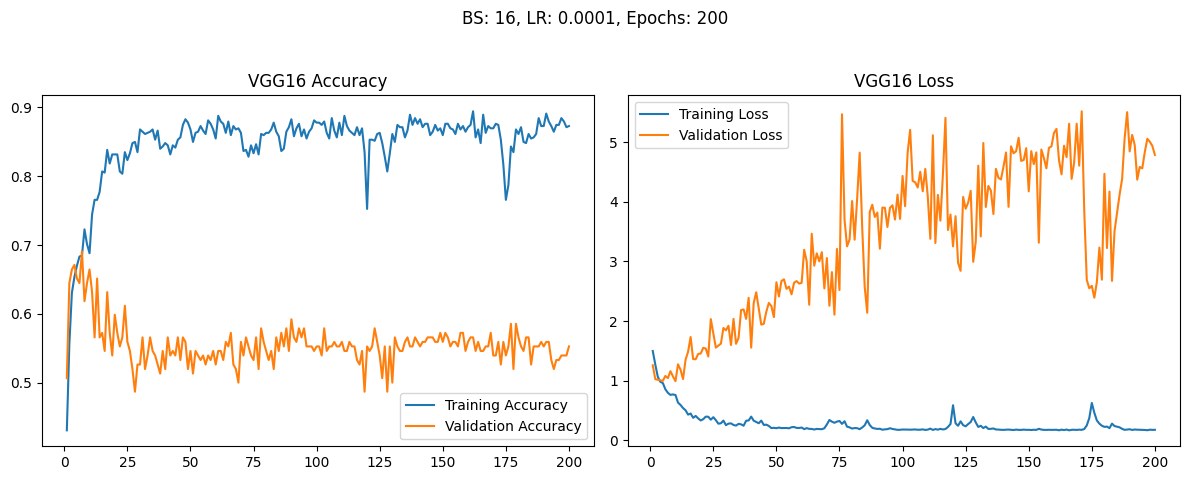

--- Testing VGG16 ---
Macro-Averaged F1 Score: 0.2415
Classification Report:
              precision    recall  f1-score   support

     Natural       0.00      0.00      0.00         7
       anger       0.00      0.00      0.00         3
        fear       0.00      0.00      0.00         3
         joy       0.81      1.00      0.89        42
     sadness       0.45      0.71      0.56        14
    surprise       0.00      0.00      0.00         6

    accuracy                           0.69        75
   macro avg       0.21      0.29      0.24        75
weighted avg       0.54      0.69      0.60        75



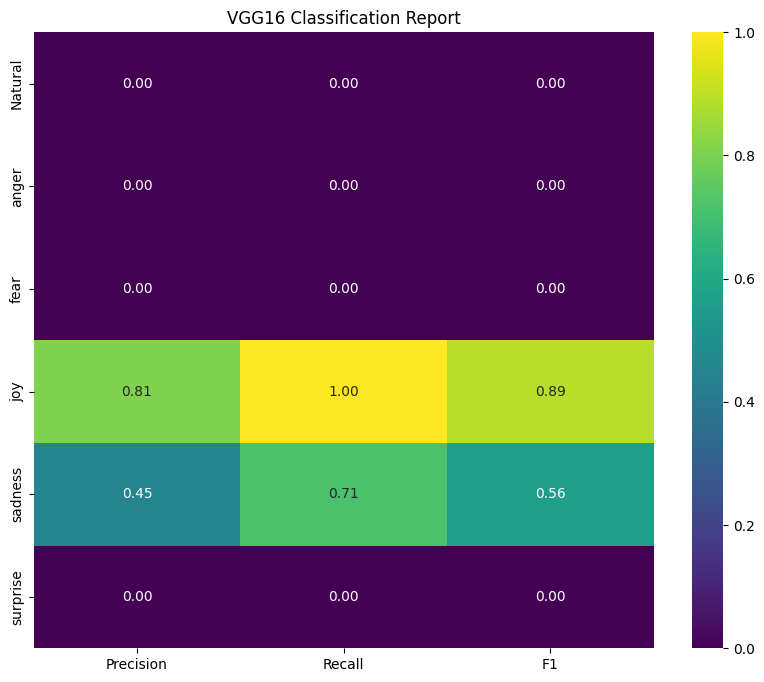

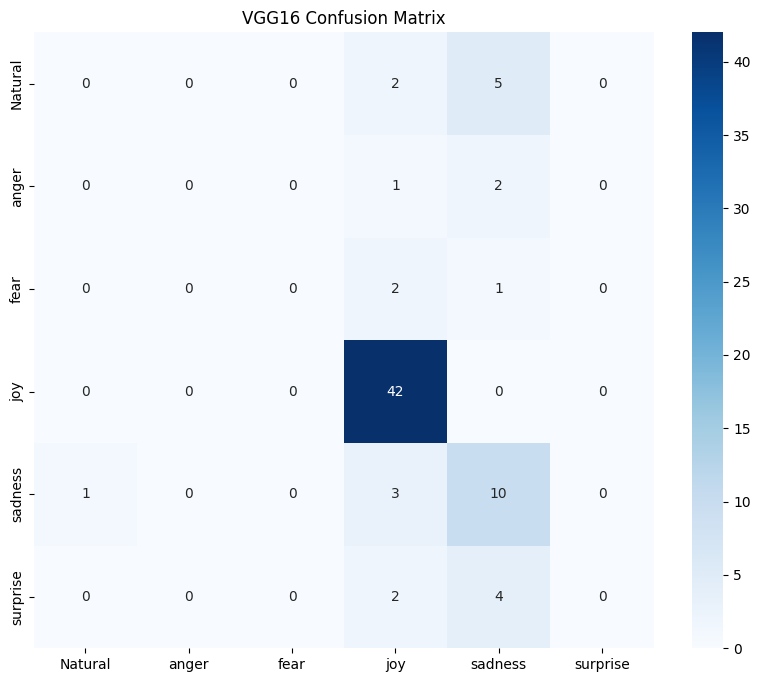

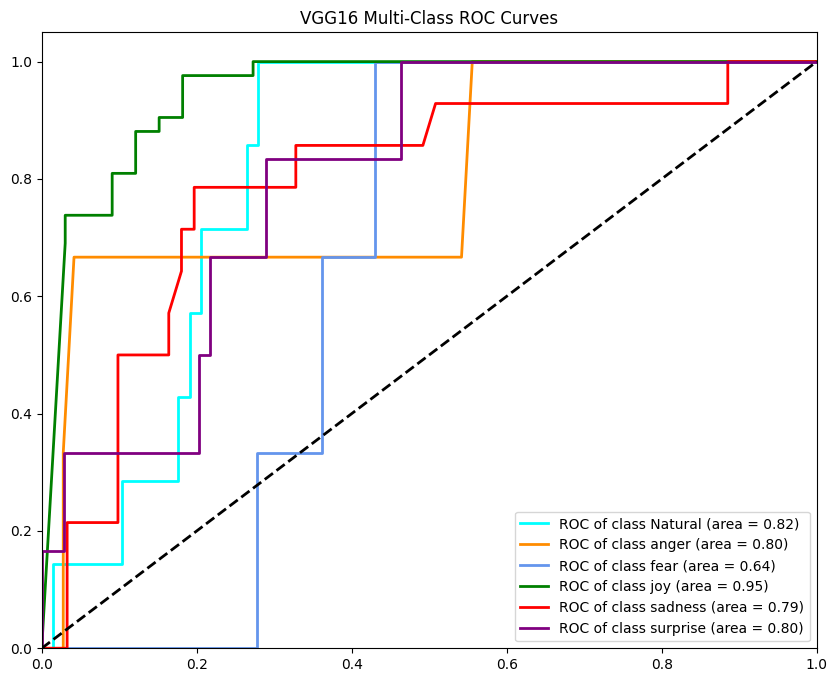

--- Training VGG16 with Batch Size: 16, LR: 0.0001, Epochs: 500 ---
Epoch 1/500 - Training: Loss = 1.5298, Accuracy = 0.4340
Epoch 1/500 - Validation: Loss = 1.3420, Accuracy = 0.5000
Time for epoch 1: 11.80s
New best model saved with validation accuracy: 0.5000
Epoch 2/500 - Training: Loss = 1.2716, Accuracy = 0.5545
Epoch 2/500 - Validation: Loss = 1.1423, Accuracy = 0.5461
Time for epoch 2: 11.83s
New best model saved with validation accuracy: 0.5461
Epoch 3/500 - Training: Loss = 1.0451, Accuracy = 0.6337
Epoch 3/500 - Validation: Loss = 0.9755, Accuracy = 0.6842
Time for epoch 3: 11.86s
New best model saved with validation accuracy: 0.6842
Epoch 4/500 - Training: Loss = 1.0045, Accuracy = 0.6485
Epoch 4/500 - Validation: Loss = 1.1149, Accuracy = 0.6053
Time for epoch 4: 12.02s
Epoch 5/500 - Training: Loss = 0.9583, Accuracy = 0.6518
Epoch 5/500 - Validation: Loss = 0.9491, Accuracy = 0.6908
Time for epoch 5: 11.80s
New best model saved with validation accuracy: 0.6908
Epoch 6/500

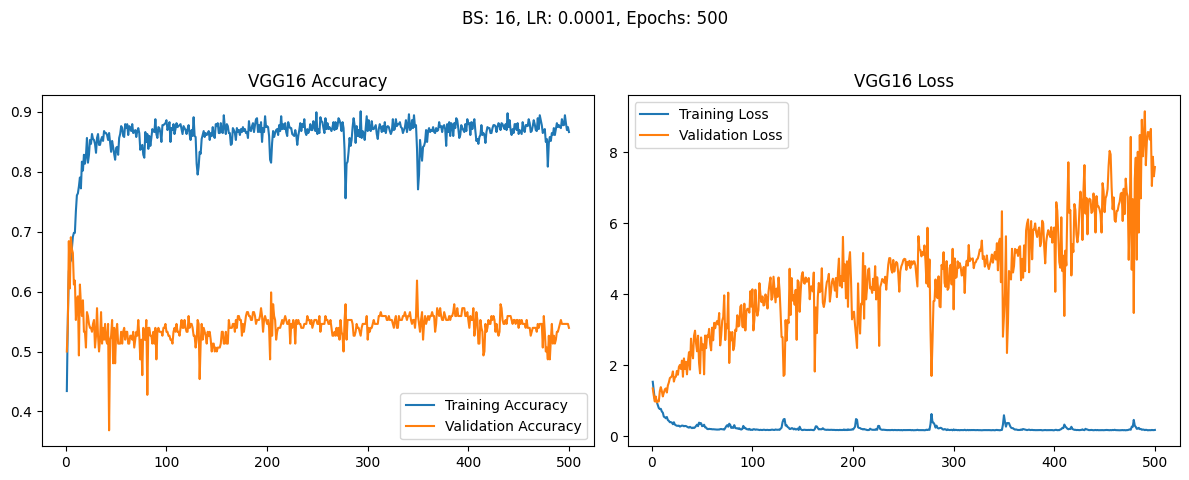

--- Testing VGG16 ---
Macro-Averaged F1 Score: 0.2450
Classification Report:
              precision    recall  f1-score   support

     Natural       0.00      0.00      0.00         7
       anger       0.00      0.00      0.00         3
        fear       0.00      0.00      0.00         3
         joy       0.82      0.98      0.89        42
     sadness       0.46      0.79      0.58        14
    surprise       0.00      0.00      0.00         6

    accuracy                           0.69        75
   macro avg       0.21      0.29      0.25        75
weighted avg       0.54      0.69      0.61        75



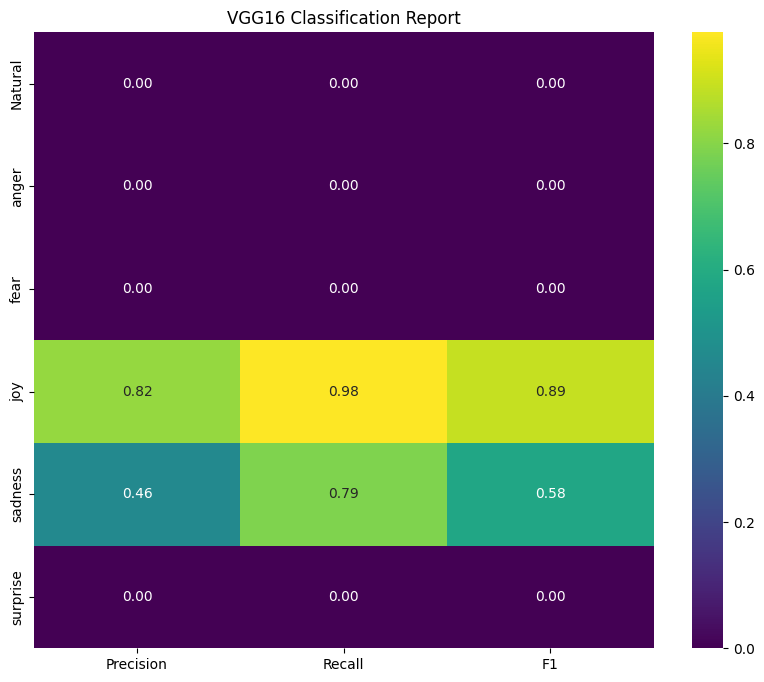

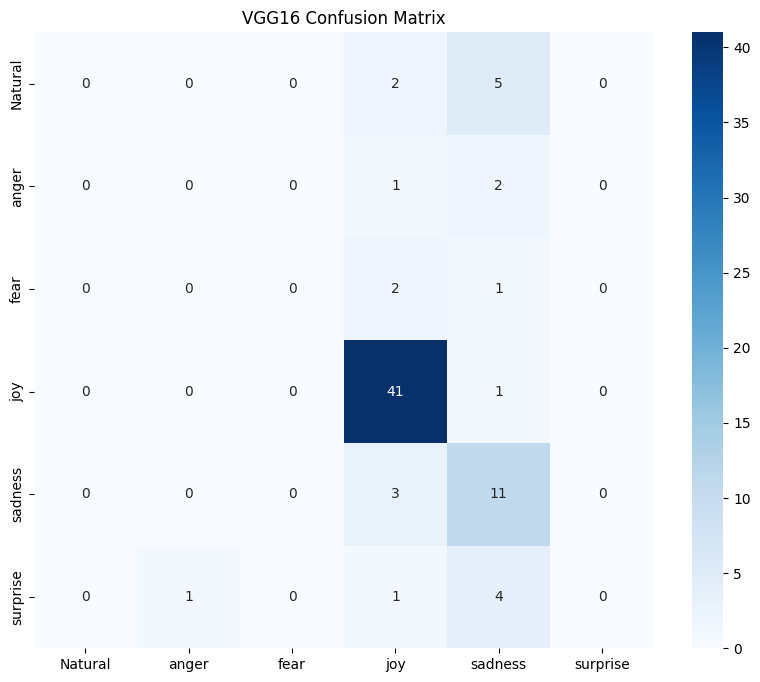

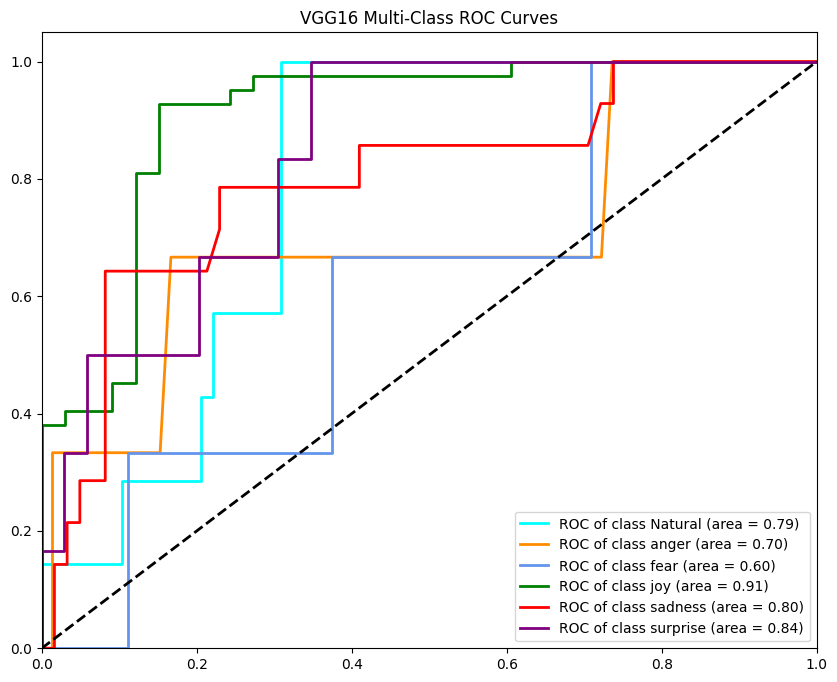

--- Training VGG16 with Batch Size: 16, LR: 0.0005, Epochs: 50 ---
Epoch 1/50 - Training: Loss = 1.6412, Accuracy = 0.4109
Epoch 1/50 - Validation: Loss = 1.5692, Accuracy = 0.5066
Time for epoch 1: 11.69s
New best model saved with validation accuracy: 0.5066
Epoch 2/50 - Training: Loss = 1.5220, Accuracy = 0.4356
Epoch 2/50 - Validation: Loss = 1.4048, Accuracy = 0.5000
Time for epoch 2: 11.64s
Epoch 3/50 - Training: Loss = 1.4709, Accuracy = 0.4521
Epoch 3/50 - Validation: Loss = 1.3847, Accuracy = 0.5000
Time for epoch 3: 11.68s
Epoch 4/50 - Training: Loss = 1.4688, Accuracy = 0.4521
Epoch 4/50 - Validation: Loss = 1.4022, Accuracy = 0.5000
Time for epoch 4: 11.47s
Epoch 5/50 - Training: Loss = 1.4712, Accuracy = 0.4488
Epoch 5/50 - Validation: Loss = 1.4179, Accuracy = 0.5000
Time for epoch 5: 11.46s
Epoch 6/50 - Training: Loss = 1.4569, Accuracy = 0.4521
Epoch 6/50 - Validation: Loss = 1.3982, Accuracy = 0.5000
Time for epoch 6: 11.45s
Epoch 7/50 - Training: Loss = 1.4647, Accurac

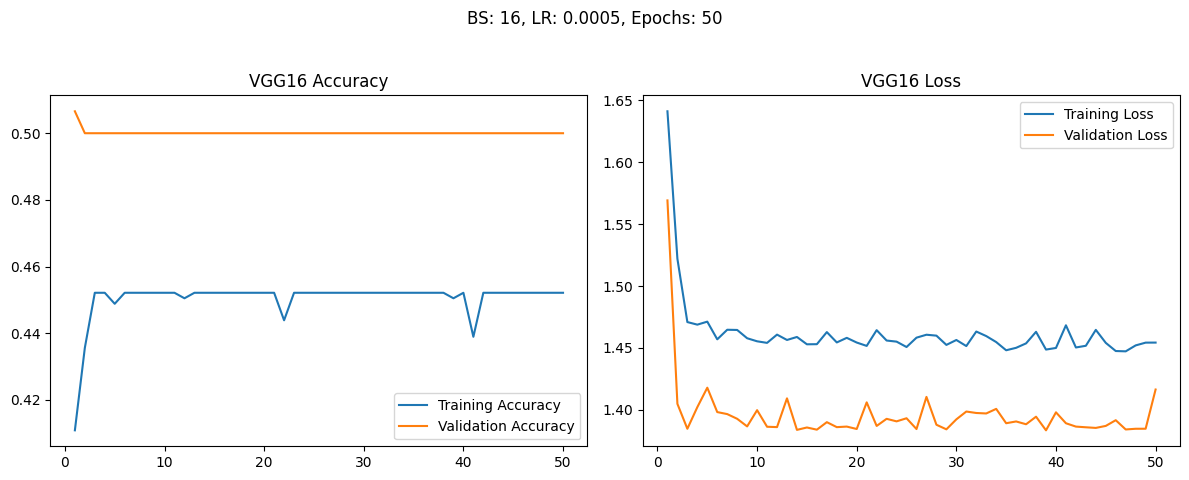

--- Testing VGG16 ---
Macro-Averaged F1 Score: 0.1365
Classification Report:
              precision    recall  f1-score   support

     Natural       0.00      0.00      0.00         7
       anger       0.00      0.00      0.00         3
        fear       0.00      0.00      0.00         3
         joy       0.56      0.95      0.71        42
     sadness       0.25      0.07      0.11        14
    surprise       0.00      0.00      0.00         6

    accuracy                           0.55        75
   macro avg       0.14      0.17      0.14        75
weighted avg       0.36      0.55      0.42        75



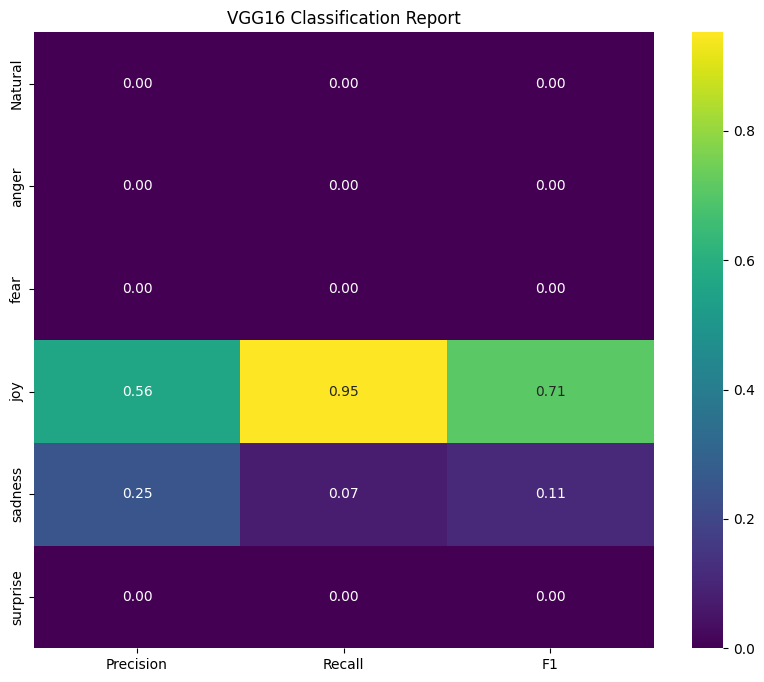

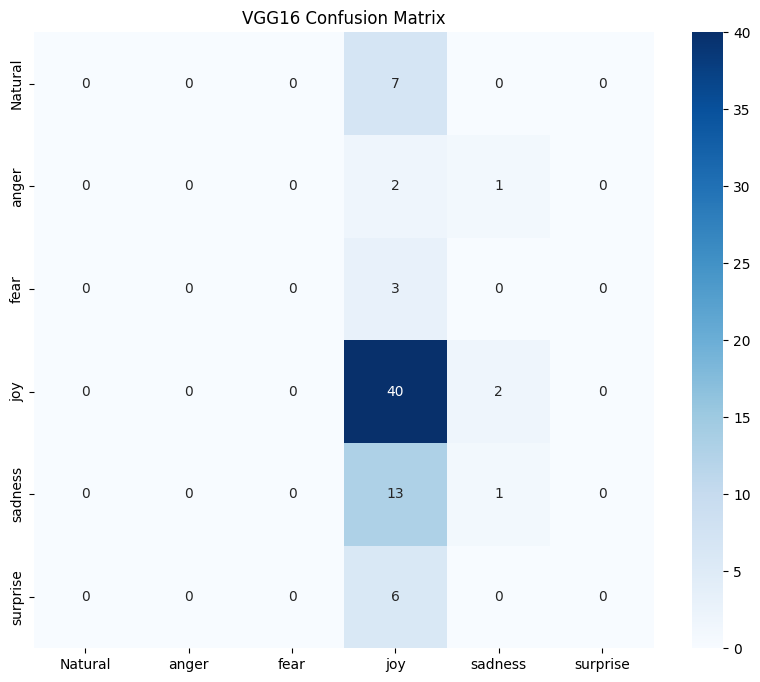

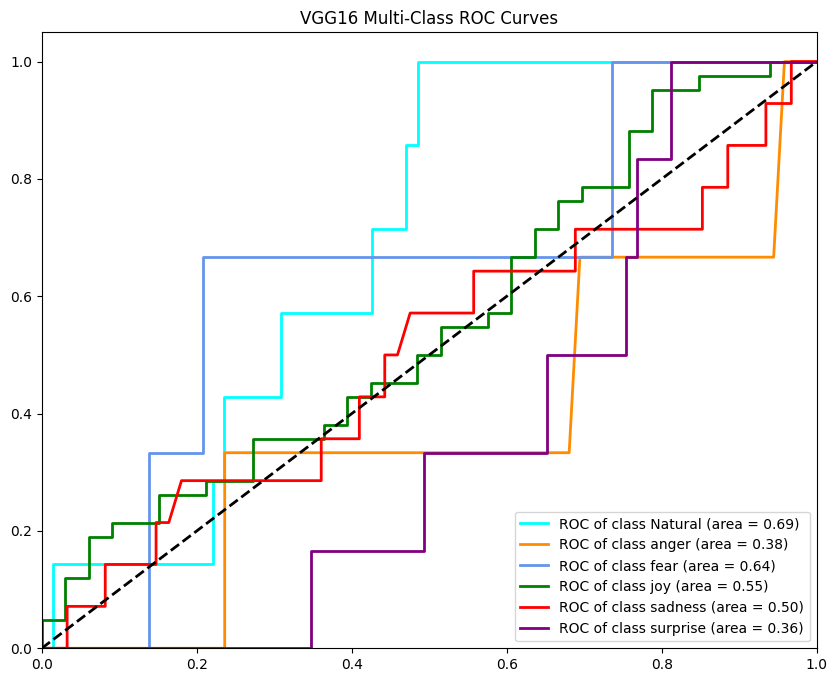

--- Training VGG16 with Batch Size: 16, LR: 0.0005, Epochs: 100 ---
Epoch 1/100 - Training: Loss = 1.7344, Accuracy = 0.3911
Epoch 1/100 - Validation: Loss = 1.3903, Accuracy = 0.5000
Time for epoch 1: 11.68s
New best model saved with validation accuracy: 0.5000
Epoch 2/100 - Training: Loss = 1.4573, Accuracy = 0.4472
Epoch 2/100 - Validation: Loss = 1.4001, Accuracy = 0.5066
Time for epoch 2: 11.69s
New best model saved with validation accuracy: 0.5066
Epoch 3/100 - Training: Loss = 1.4619, Accuracy = 0.4488
Epoch 3/100 - Validation: Loss = 1.3000, Accuracy = 0.5066
Time for epoch 3: 11.74s
Epoch 4/100 - Training: Loss = 1.4087, Accuracy = 0.4703
Epoch 4/100 - Validation: Loss = 1.1853, Accuracy = 0.5921
Time for epoch 4: 11.72s
New best model saved with validation accuracy: 0.5921
Epoch 5/100 - Training: Loss = 1.2681, Accuracy = 0.5462
Epoch 5/100 - Validation: Loss = 1.2092, Accuracy = 0.5855
Time for epoch 5: 11.66s
Epoch 6/100 - Training: Loss = 1.2049, Accuracy = 0.5677
Epoch 6/

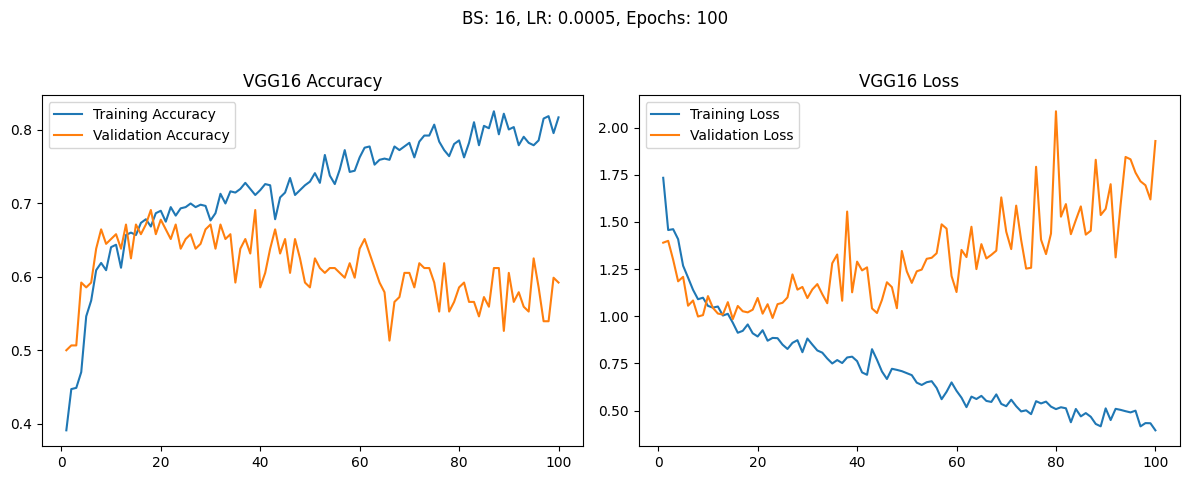

--- Testing VGG16 ---
Macro-Averaged F1 Score: 0.2470
Classification Report:
              precision    recall  f1-score   support

     Natural       0.00      0.00      0.00         7
       anger       0.00      0.00      0.00         3
        fear       0.00      0.00      0.00         3
         joy       0.82      1.00      0.90        42
     sadness       0.46      0.79      0.58        14
    surprise       0.00      0.00      0.00         6

    accuracy                           0.71        75
   macro avg       0.21      0.30      0.25        75
weighted avg       0.55      0.71      0.61        75



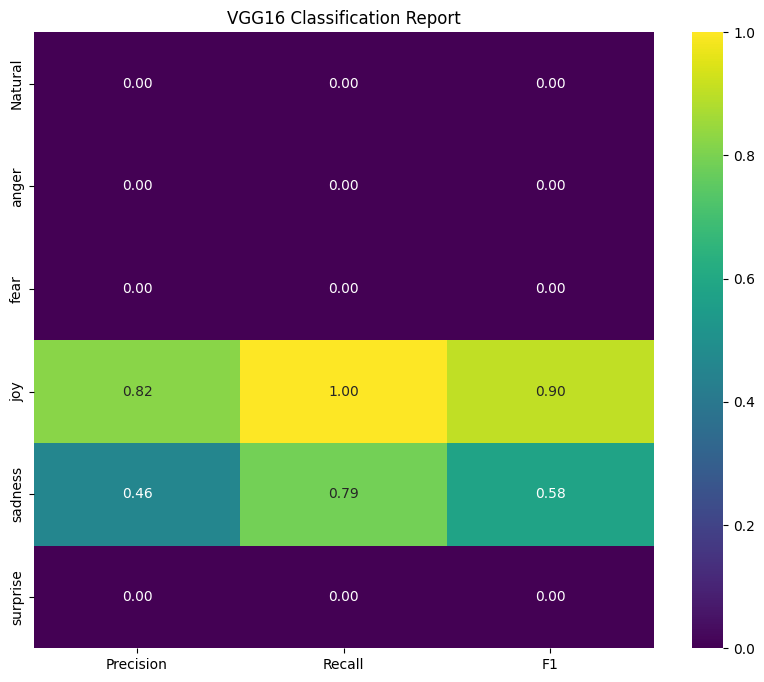

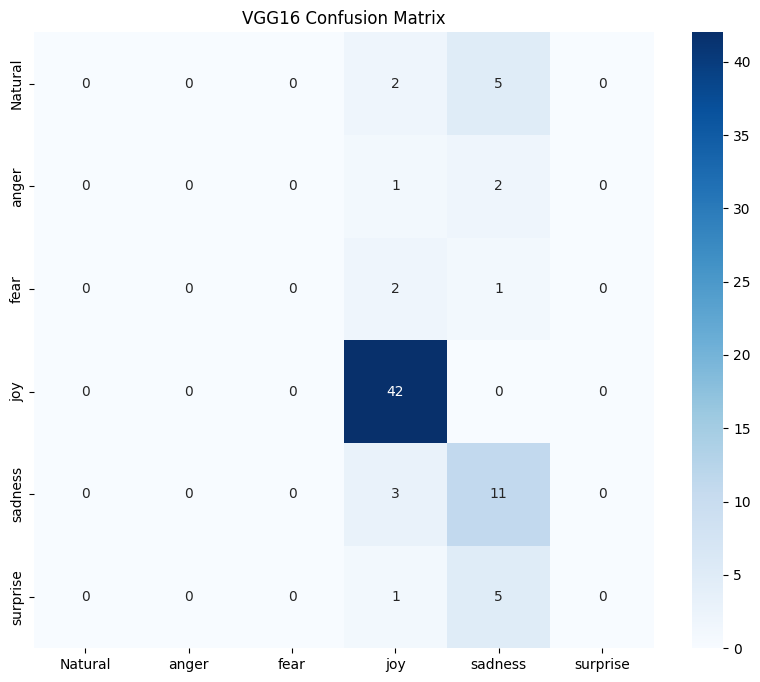

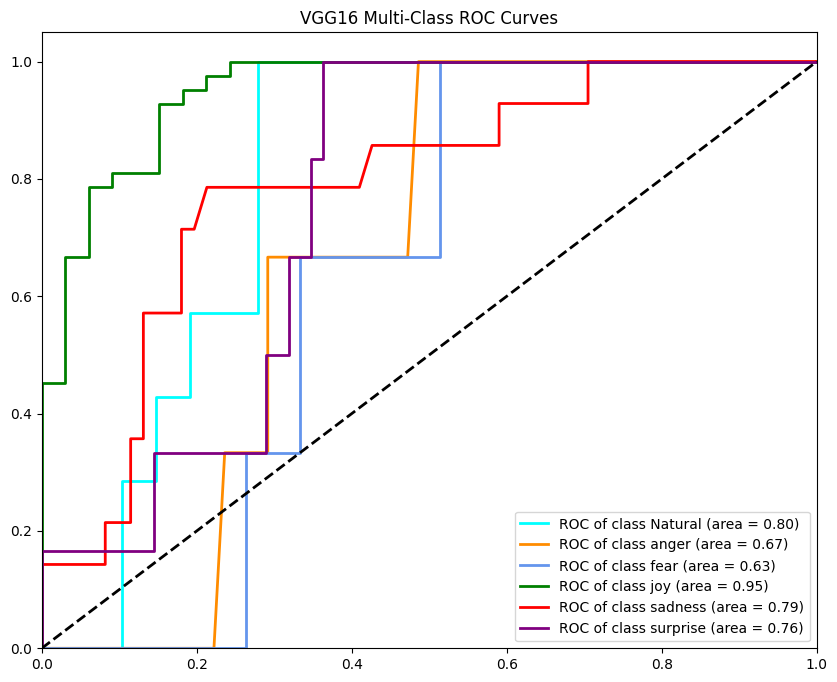

--- Training VGG16 with Batch Size: 16, LR: 0.0005, Epochs: 200 ---
Epoch 1/200 - Training: Loss = 1.7111, Accuracy = 0.4455
Epoch 1/200 - Validation: Loss = 1.4277, Accuracy = 0.5000
Time for epoch 1: 11.80s
New best model saved with validation accuracy: 0.5000
Epoch 2/200 - Training: Loss = 1.4823, Accuracy = 0.4373
Epoch 2/200 - Validation: Loss = 1.4126, Accuracy = 0.5000
Time for epoch 2: 11.66s
Epoch 3/200 - Training: Loss = 1.4682, Accuracy = 0.4521
Epoch 3/200 - Validation: Loss = 1.4130, Accuracy = 0.5000
Time for epoch 3: 11.68s
Epoch 4/200 - Training: Loss = 1.4575, Accuracy = 0.4505
Epoch 4/200 - Validation: Loss = 1.4303, Accuracy = 0.4737
Time for epoch 4: 11.62s
Epoch 5/200 - Training: Loss = 1.4830, Accuracy = 0.4274
Epoch 5/200 - Validation: Loss = 1.3882, Accuracy = 0.5000
Time for epoch 5: 11.75s
Epoch 6/200 - Training: Loss = 1.5088, Accuracy = 0.4472
Epoch 6/200 - Validation: Loss = 1.4345, Accuracy = 0.5000
Time for epoch 6: 11.78s
Epoch 7/200 - Training: Loss = 1

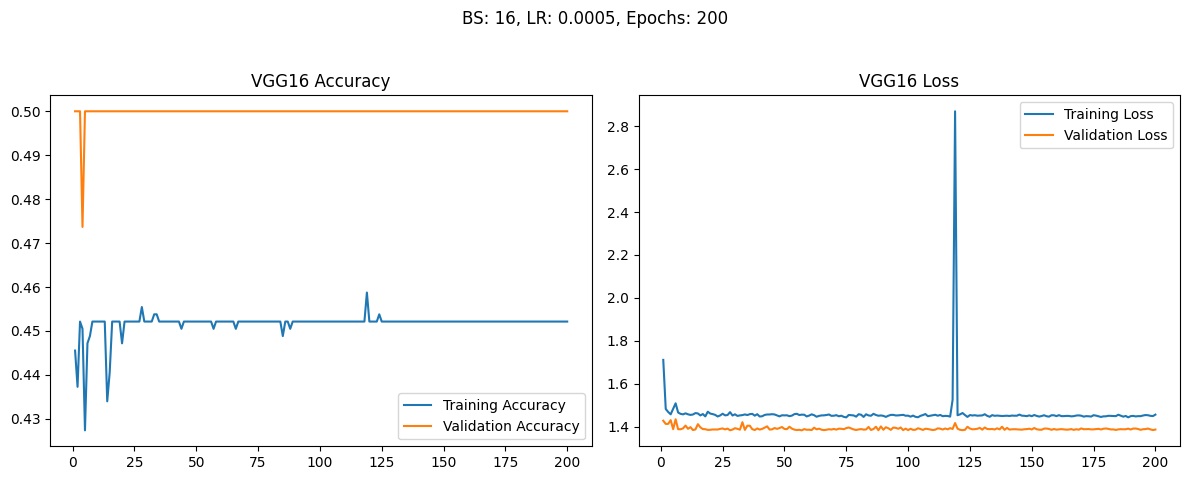

--- Testing VGG16 ---
Macro-Averaged F1 Score: 0.1197
Classification Report:
              precision    recall  f1-score   support

     Natural       0.00      0.00      0.00         7
       anger       0.00      0.00      0.00         3
        fear       0.00      0.00      0.00         3
         joy       0.56      1.00      0.72        42
     sadness       0.00      0.00      0.00        14
    surprise       0.00      0.00      0.00         6

    accuracy                           0.56        75
   macro avg       0.09      0.17      0.12        75
weighted avg       0.31      0.56      0.40        75



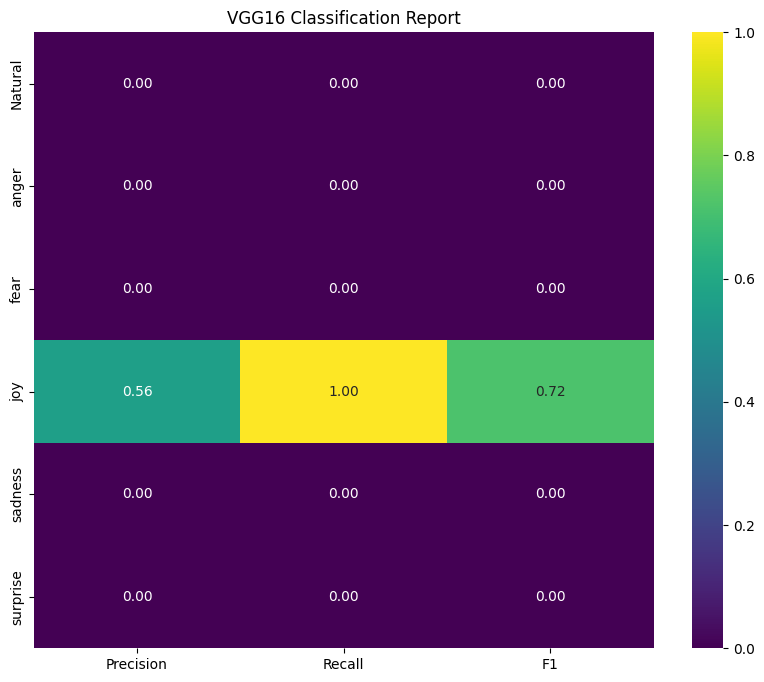

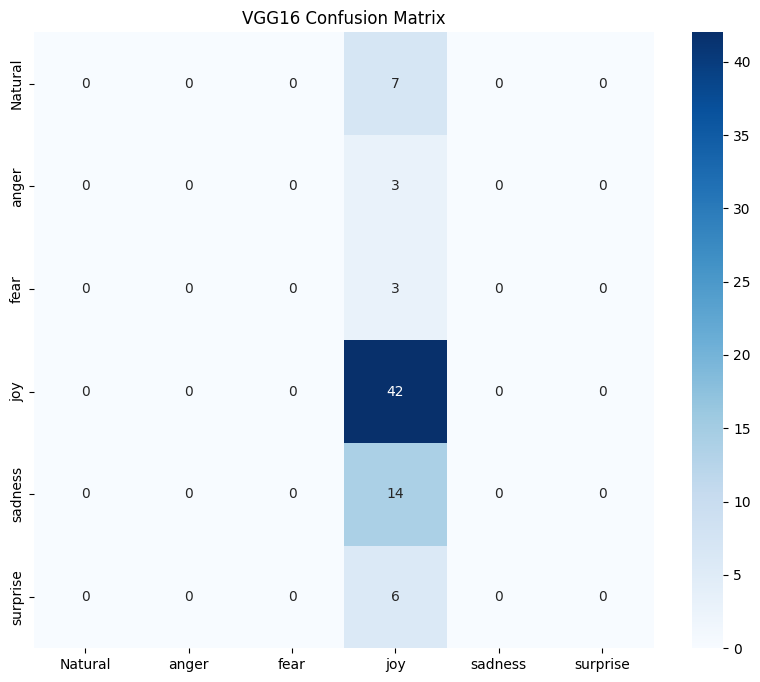

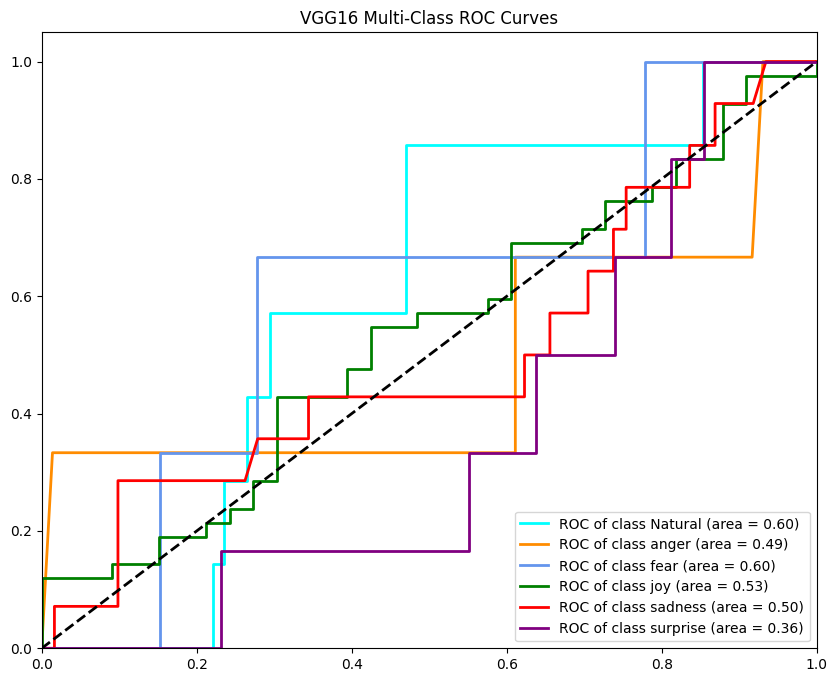

--- Training VGG16 with Batch Size: 16, LR: 0.0005, Epochs: 500 ---
Epoch 1/500 - Training: Loss = 1.6571, Accuracy = 0.3878
Epoch 1/500 - Validation: Loss = 1.4172, Accuracy = 0.5000
Time for epoch 1: 11.69s
New best model saved with validation accuracy: 0.5000
Epoch 2/500 - Training: Loss = 1.4656, Accuracy = 0.4340
Epoch 2/500 - Validation: Loss = 1.4724, Accuracy = 0.5000
Time for epoch 2: 11.67s
Epoch 3/500 - Training: Loss = 1.4736, Accuracy = 0.4538
Epoch 3/500 - Validation: Loss = 1.3854, Accuracy = 0.5000
Time for epoch 3: 11.66s
Epoch 4/500 - Training: Loss = 1.4611, Accuracy = 0.4373
Epoch 4/500 - Validation: Loss = 1.3944, Accuracy = 0.5000
Time for epoch 4: 11.71s
Epoch 5/500 - Training: Loss = 1.4583, Accuracy = 0.4521
Epoch 5/500 - Validation: Loss = 1.3978, Accuracy = 0.5000
Time for epoch 5: 11.49s
Epoch 6/500 - Training: Loss = 1.4666, Accuracy = 0.4521
Epoch 6/500 - Validation: Loss = 1.3898, Accuracy = 0.5000
Time for epoch 6: 11.52s
Epoch 7/500 - Training: Loss = 1

In [ ]:

# Image classification pipeline using VGG16


import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import random
from itertools import cycle
from sklearn.preprocessing import label_binarize
import os



# Ensure reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# --- DATASET PATHS ---
base_data_dir = 'dataset/Autistic Children Emotions - Dr. Fatma M. Talaat'
train_dir = os.path.join(base_data_dir, 'Train')
test_dir = os.path.join(base_data_dir, 'Test')


# --- HYPERPARAMETERS ---
batch_sizes = [16]
learning_rates = [0.0001,0.0005, 0.001, 0.005,0.05, 0.01]
epoch_counts = [50,100,200,500]
NUM_CLASSES = 6
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {DEVICE}")

# --- DATA TRANSFORMATIONS ---
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# --- DATASET LOADING & SPLITTING ---
full_train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['val'])

train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_train_dataset, [train_size, val_size])

val_dataset.dataset = type(full_train_dataset)(
    root=train_dir,
    transform=data_transforms['val']
)
val_dataset.dataset.transform = data_transforms['val']


print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Classes: {full_train_dataset.classes}")


def train_and_validate(model, train_loader, val_loader, criterion, optimizer, epochs, model_name):
    """Handles the training and validation loop for the model."""
    train_acc_history, val_acc_history = [], []
    train_loss_history, val_loss_history = [], []
    total_training_time = 0
    best_val_acc = 0.0

    for epoch in range(epochs):
        epoch_start_time = time.time()

        model.train()
        train_loss, train_correct = 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            train_correct += torch.sum(preds == labels.data)

        train_loss /= len(train_loader.dataset)
        train_acc = train_correct.double() / len(train_loader.dataset)
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc.cpu())

        print(f"Epoch {epoch + 1}/{epochs} - Training: Loss = {train_loss:.4f}, Accuracy = {train_acc:.4f}")

        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_correct.double() / len(val_loader.dataset)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc.cpu())

        epoch_time = time.time() - epoch_start_time
        total_training_time += epoch_time

        print(f"Epoch {epoch + 1}/{epochs} - Validation: Loss = {val_loss:.4f}, Accuracy = {val_acc:.4f}")
        print(f"Time for epoch {epoch + 1}: {epoch_time:.2f}s")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), f'best_model_{model_name}.pth')
            print(f"New best model saved with validation accuracy: {val_acc:.4f}")

    print(f"Total Training Time: {total_training_time:.2f}s")
    return train_acc_history, val_acc_history, train_loss_history, val_loss_history


def test_and_evaluate(model, test_loader, class_names, model_name, batch_size, lr, epochs):
    """Handles testing the model and generating evaluation plots."""
    model.eval()
    all_labels, all_preds, all_probs = [], [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            probs = nn.Softmax(dim=1)(outputs)
            _, preds = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    macro_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    print(f"Macro-Averaged F1 Score: {macro_f1:.4f}")

    report = classification_report(all_labels, all_preds, target_names=class_names, zero_division=0)
    print("Classification Report:\n" + report)

    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, labels=range(len(class_names)), zero_division=0)
    metrics_df = np.array([precision, recall, f1]).T
    plt.figure(figsize=(10, 8))
    sns.heatmap(metrics_df, annot=True, cmap="viridis", fmt='.2f', xticklabels=["Precision", "Recall", "F1"], yticklabels=class_names)
    plt.title(f"{model_name} Classification Report")
    plt.show()
    plt.savefig(f'{model_name}_classification_report.png', dpi=300, bbox_inches='tight')
    plt.close()

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()
    plt.savefig(f'{model_name}_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.close()

    all_labels_binarized = label_binarize(all_labels, classes=range(NUM_CLASSES))
    all_probs = np.array(all_probs)
    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
    for i, color in zip(range(NUM_CLASSES), colors):
        if len(np.unique(all_labels_binarized[:, i])) > 1:
            fpr, tpr, _ = roc_curve(all_labels_binarized[:, i], all_probs[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=color, lw=2, label=f'ROC of class {class_names[i]} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title(f'{model_name} Multi-Class ROC Curves')
    plt.legend(loc="lower right")
    plt.show()
    plt.savefig(f'{model_name}_ROC_All_Classes.png', dpi=300, bbox_inches='tight')
    plt.close()


# --- MAIN EXECUTION LOOP ---
MODEL_NAME = "VGG16"

for batch_size in batch_sizes:
    for lr in learning_rates:
        for epochs in epoch_counts:
            print(f"--- Training {MODEL_NAME} with Batch Size: {batch_size}, LR: {lr}, Epochs: {epochs} ---")

            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

            model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
            num_ftrs = model.classifier[6].in_features
            model.classifier[6] = nn.Linear(num_ftrs, NUM_CLASSES)
            model = model.to(DEVICE)

            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            train_acc, val_acc, train_loss, val_loss = train_and_validate(
                model, train_loader, val_loader, criterion, optimizer, epochs, MODEL_NAME
            )

            epochs_range = range(1, len(train_acc) + 1)
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.plot(epochs_range, [acc.numpy() for acc in train_acc], label='Training Accuracy')
            plt.plot(epochs_range, [acc.numpy() for acc in val_acc], label='Validation Accuracy')
            plt.title(f'{MODEL_NAME} Accuracy')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(epochs_range, train_loss, label='Training Loss')
            plt.plot(epochs_range, val_loss, label='Validation Loss')
            plt.title(f'{MODEL_NAME} Loss')
            plt.legend()

            plt.suptitle(f'BS: {batch_size}, LR: {lr}, Epochs: {epochs}')
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()
            plt.savefig(f'{MODEL_NAME}_acc_loss_curves.png', dpi=300)
            plt.close()

            print(f"--- Testing {MODEL_NAME} ---")
            model.load_state_dict(torch.load(f'best_model_{MODEL_NAME}.pth'))
            test_and_evaluate(model, test_loader, full_train_dataset.classes, MODEL_NAME, batch_size, lr, epochs)

            print("="*60)


In [ ]:

# Image classification pipeline using VGG16


import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import random
from itertools import cycle
from sklearn.preprocessing import label_binarize
import os



# Ensure reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# --- DATASET PATHS ---
base_data_dir = 'dataset/Autistic Children Emotions - Dr. Fatma M. Talaat'
train_dir = os.path.join(base_data_dir, 'Train')
test_dir = os.path.join(base_data_dir, 'Test')


# --- HYPERPARAMETERS ---
batch_sizes = [32]
learning_rates = [0.0001,0.0005, 0.001, 0.005,0.05, 0.01]
epoch_counts = [50,100,200,500]
NUM_CLASSES = 6
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {DEVICE}")

# --- DATA TRANSFORMATIONS ---
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# --- DATASET LOADING & SPLITTING ---
full_train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['val'])

train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_train_dataset, [train_size, val_size])

val_dataset.dataset = type(full_train_dataset)(
    root=train_dir,
    transform=data_transforms['val']
)
val_dataset.dataset.transform = data_transforms['val']


print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Classes: {full_train_dataset.classes}")


def train_and_validate(model, train_loader, val_loader, criterion, optimizer, epochs, model_name):
    """Handles the training and validation loop for the model."""
    train_acc_history, val_acc_history = [], []
    train_loss_history, val_loss_history = [], []
    total_training_time = 0
    best_val_acc = 0.0

    for epoch in range(epochs):
        epoch_start_time = time.time()

        model.train()
        train_loss, train_correct = 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            train_correct += torch.sum(preds == labels.data)

        train_loss /= len(train_loader.dataset)
        train_acc = train_correct.double() / len(train_loader.dataset)
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc.cpu())

        print(f"Epoch {epoch + 1}/{epochs} - Training: Loss = {train_loss:.4f}, Accuracy = {train_acc:.4f}")

        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_correct.double() / len(val_loader.dataset)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc.cpu())

        epoch_time = time.time() - epoch_start_time
        total_training_time += epoch_time

        print(f"Epoch {epoch + 1}/{epochs} - Validation: Loss = {val_loss:.4f}, Accuracy = {val_acc:.4f}")
        print(f"Time for epoch {epoch + 1}: {epoch_time:.2f}s")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), f'best_model_{model_name}.pth')
            print(f"New best model saved with validation accuracy: {val_acc:.4f}")

    print(f"Total Training Time: {total_training_time:.2f}s")
    return train_acc_history, val_acc_history, train_loss_history, val_loss_history


def test_and_evaluate(model, test_loader, class_names, model_name, batch_size, lr, epochs):
    """Handles testing the model and generating evaluation plots."""
    model.eval()
    all_labels, all_preds, all_probs = [], [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            probs = nn.Softmax(dim=1)(outputs)
            _, preds = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    macro_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    print(f"Macro-Averaged F1 Score: {macro_f1:.4f}")

    report = classification_report(all_labels, all_preds, target_names=class_names, zero_division=0)
    print("Classification Report:\n" + report)

    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, labels=range(len(class_names)), zero_division=0)
    metrics_df = np.array([precision, recall, f1]).T
    plt.figure(figsize=(10, 8))
    sns.heatmap(metrics_df, annot=True, cmap="viridis", fmt='.2f', xticklabels=["Precision", "Recall", "F1"], yticklabels=class_names)
    plt.title(f"{model_name} Classification Report")
    plt.show()
    plt.savefig(f'{model_name}_classification_report.png', dpi=300, bbox_inches='tight')
    plt.close()

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()
    plt.savefig(f'{model_name}_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.close()

    all_labels_binarized = label_binarize(all_labels, classes=range(NUM_CLASSES))
    all_probs = np.array(all_probs)
    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
    for i, color in zip(range(NUM_CLASSES), colors):
        if len(np.unique(all_labels_binarized[:, i])) > 1:
            fpr, tpr, _ = roc_curve(all_labels_binarized[:, i], all_probs[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=color, lw=2, label=f'ROC of class {class_names[i]} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title(f'{model_name} Multi-Class ROC Curves')
    plt.legend(loc="lower right")
    plt.show()
    plt.savefig(f'{model_name}_ROC_All_Classes.png', dpi=300, bbox_inches='tight')
    plt.close()


# --- MAIN EXECUTION LOOP ---
MODEL_NAME = "VGG16"

for batch_size in batch_sizes:
    for lr in learning_rates:
        for epochs in epoch_counts:
            print(f"--- Training {MODEL_NAME} with Batch Size: {batch_size}, LR: {lr}, Epochs: {epochs} ---")

            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

            model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
            num_ftrs = model.classifier[6].in_features
            model.classifier[6] = nn.Linear(num_ftrs, NUM_CLASSES)
            model = model.to(DEVICE)

            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            train_acc, val_acc, train_loss, val_loss = train_and_validate(
                model, train_loader, val_loader, criterion, optimizer, epochs, MODEL_NAME
            )

            epochs_range = range(1, len(train_acc) + 1)
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.plot(epochs_range, [acc.numpy() for acc in train_acc], label='Training Accuracy')
            plt.plot(epochs_range, [acc.numpy() for acc in val_acc], label='Validation Accuracy')
            plt.title(f'{MODEL_NAME} Accuracy')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(epochs_range, train_loss, label='Training Loss')
            plt.plot(epochs_range, val_loss, label='Validation Loss')
            plt.title(f'{MODEL_NAME} Loss')
            plt.legend()

            plt.suptitle(f'BS: {batch_size}, LR: {lr}, Epochs: {epochs}')
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()
            plt.savefig(f'{MODEL_NAME}_acc_loss_curves.png', dpi=300)
            plt.close()

            print(f"--- Testing {MODEL_NAME} ---")
            model.load_state_dict(torch.load(f'best_model_{MODEL_NAME}.pth'))
            test_and_evaluate(model, test_loader, full_train_dataset.classes, MODEL_NAME, batch_size, lr, epochs)

            print("="*60)


# VGG19

In [ ]:
# Image classification pipeline using VGG19

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import random
from itertools import cycle
from sklearn.preprocessing import label_binarize
import os


# Ensure reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# --- DATASET PATHS ---
base_data_dir = 'dataset/Autistic Children Emotions - Dr. Fatma M. Talaat'
train_dir = os.path.join(base_data_dir, 'Train')
test_dir = os.path.join(base_data_dir, 'Test')


# --- HYPERPARAMETERS ---
batch_sizes = [32]
learning_rates = [0.0001]
epoch_counts = [50]
NUM_CLASSES = 6
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {DEVICE}")

# --- DATA TRANSFORMATIONS ---
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# --- DATASET LOADING & SPLITTING ---
full_train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['val'])

train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_train_dataset, [train_size, val_size])

val_dataset.dataset = type(full_train_dataset)(
    root=train_dir,
    transform=data_transforms['val']
)
val_dataset.dataset.transform = data_transforms['val']

print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Classes: {full_train_dataset.classes}")


def train_and_validate(model, train_loader, val_loader, criterion, optimizer, epochs, model_name):
    """Handles the training and validation loop for the model."""
    train_acc_history, val_acc_history = [], []
    train_loss_history, val_loss_history = [], []
    total_training_time = 0
    best_val_acc = 0.0

    for epoch in range(epochs):
        epoch_start_time = time.time()

        model.train()
        train_loss, train_correct = 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            train_correct += torch.sum(preds == labels.data)

        train_loss /= len(train_loader.dataset)
        train_acc = train_correct.double() / len(train_loader.dataset)
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc.cpu())

        print(f"Epoch {epoch + 1}/{epochs} - Training: Loss = {train_loss:.4f}, Accuracy = {train_acc:.4f}")

        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_correct.double() / len(val_loader.dataset)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc.cpu())

        epoch_time = time.time() - epoch_start_time
        total_training_time += epoch_time

        print(f"Epoch {epoch + 1}/{epochs} - Validation: Loss = {val_loss:.4f}, Accuracy = {val_acc:.4f}")
        print(f"Time for epoch {epoch + 1}: {epoch_time:.2f}s")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), f'best_model_{model_name}.pth')
            print(f"New best model saved with validation accuracy: {val_acc:.4f}")

    print(f"Total Training Time: {total_training_time:.2f}s")
    return train_acc_history, val_acc_history, train_loss_history, val_loss_history


def test_and_evaluate(model, test_loader, class_names, model_name, batch_size, lr, epochs):
    """Handles testing the model and generating evaluation plots."""
    model.eval()
    all_labels, all_preds, all_probs = [], [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            probs = nn.Softmax(dim=1)(outputs)
            _, preds = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    macro_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    print(f"Macro-Averaged F1 Score: {macro_f1:.4f}")

    report = classification_report(all_labels, all_preds, target_names=class_names, zero_division=0)
    print("Classification Report:\n" + report)

    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, labels=range(len(class_names)), zero_division=0)
    metrics_df = np.array([precision, recall, f1]).T
    plt.figure(figsize=(10, 8))
    sns.heatmap(metrics_df, annot=True, cmap="viridis", fmt='.2f', xticklabels=["Precision", "Recall", "F1"], yticklabels=class_names)
    plt.title(f"{model_name} Classification Report")
    plt.savefig(f'{model_name}_classification_report.png', dpi=300, bbox_inches='tight')
    plt.close()

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{model_name} Confusion Matrix")
    plt.savefig(f'{model_name}_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.close()

    all_labels_binarized = label_binarize(all_labels, classes=range(NUM_CLASSES))
    all_probs = np.array(all_probs)
    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
    for i, color in zip(range(NUM_CLASSES), colors):
        if len(np.unique(all_labels_binarized[:, i])) > 1:
            fpr, tpr, _ = roc_curve(all_labels_binarized[:, i], all_probs[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=color, lw=2, label=f'ROC of class {class_names[i]} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title(f'{model_name} Multi-Class ROC Curves')
    plt.legend(loc="lower right")
    plt.savefig(f'{model_name}_ROC_All_Classes.png', dpi=300, bbox_inches='tight')
    plt.close()


# --- MAIN EXECUTION LOOP ---
MODEL_NAME = "VGG19"

for batch_size in batch_sizes:
    for lr in learning_rates:
        for epochs in epoch_counts:
            print(f"--- Training {MODEL_NAME} with Batch Size: {batch_size}, LR: {lr}, Epochs: {epochs} ---")

            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

            model = models.vgg19(weights=models.VGG19_Weights.IMAGENET1K_V1)
            num_ftrs = model.classifier[6].in_features
            model.classifier[6] = nn.Linear(num_ftrs, NUM_CLASSES)
            model = model.to(DEVICE)

            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            train_acc, val_acc, train_loss, val_loss = train_and_validate(
                model, train_loader, val_loader, criterion, optimizer, epochs, MODEL_NAME
            )

            epochs_range = range(1, len(train_acc) + 1)
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.plot(epochs_range, [acc.numpy() for acc in train_acc], label='Training Accuracy')
            plt.plot(epochs_range, [acc.numpy() for acc in val_acc], label='Validation Accuracy')
            plt.title(f'{MODEL_NAME} Accuracy')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(epochs_range, train_loss, label='Training Loss')
            plt.plot(epochs_range, val_loss, label='Validation Loss')
            plt.title(f'{MODEL_NAME} Loss')
            plt.legend()

            plt.suptitle(f'BS: {batch_size}, LR: {lr}, Epochs: {epochs}')
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.savefig(f'{MODEL_NAME}_acc_loss_curves.png', dpi=300)
            plt.close()

            print(f"--- Testing {MODEL_NAME} ---")
            model.load_state_dict(torch.load(f'best_model_{MODEL_NAME}.pth'))
            test_and_evaluate(model, test_loader, full_train_dataset.classes, MODEL_NAME, batch_size, lr, epochs)

            print("="*60)


Using device: cuda
Training dataset size: 606
Validation dataset size: 152
Test dataset size: 75
Classes: ['Natural', 'anger', 'fear', 'joy', 'sadness', 'surprise']
--- Training VGG19 with Batch Size: 32, LR: 0.0001, Epochs: 50 ---


Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:07<00:00, 76.7MB/s]


Epoch 1/50 - Training: Loss = 1.5054, Accuracy = 0.4241
Epoch 1/50 - Validation: Loss = 1.2584, Accuracy = 0.5526
Time for epoch 1: 13.06s
New best model saved with validation accuracy: 0.5526
Epoch 2/50 - Training: Loss = 1.2055, Accuracy = 0.5660
Epoch 2/50 - Validation: Loss = 1.0855, Accuracy = 0.6184
Time for epoch 2: 14.87s
New best model saved with validation accuracy: 0.6184
Epoch 3/50 - Training: Loss = 1.0586, Accuracy = 0.6419
Epoch 3/50 - Validation: Loss = 0.9007, Accuracy = 0.7039
Time for epoch 3: 13.60s
New best model saved with validation accuracy: 0.7039
Epoch 4/50 - Training: Loss = 0.9394, Accuracy = 0.6733
Epoch 4/50 - Validation: Loss = 1.1801, Accuracy = 0.6316
Time for epoch 4: 13.42s
Epoch 5/50 - Training: Loss = 0.9412, Accuracy = 0.6650
Epoch 5/50 - Validation: Loss = 0.8893, Accuracy = 0.7039
Time for epoch 5: 13.27s
Epoch 6/50 - Training: Loss = 0.8999, Accuracy = 0.6865
Epoch 6/50 - Validation: Loss = 0.9088, Accuracy = 0.6842
Time for epoch 6: 13.63s
Epoc

# ResNet50

In [ ]:

# Image classification pipeline using ResNet50


import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import random
from itertools import cycle
from sklearn.preprocessing import label_binarize
import os


# Ensure reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# --- DATASET PATHS ---
base_data_dir = 'dataset/Autistic Children Emotions - Dr. Fatma M. Talaat'
train_dir = os.path.join(base_data_dir, 'Train')
test_dir = os.path.join(base_data_dir, 'Test')


# --- HYPERPARAMETERS ---
batch_sizes = [16,32,64,128]
learning_rates = [0.0001,0.0005, 0.001, 0.005,0.05, 0.01]
epoch_counts = [50,100,200,500]
NUM_CLASSES = 6
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {DEVICE}")

# --- DATA TRANSFORMATIONS ---
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# --- DATASET LOADING & SPLITTING ---
full_train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['val'])

train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_train_dataset, [train_size, val_size])

val_dataset.dataset = type(full_train_dataset)(
    root=train_dir,
    transform=data_transforms['val']
)
val_dataset.dataset.transform = data_transforms['val']

print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Classes: {full_train_dataset.classes}")


def train_and_validate(model, train_loader, val_loader, criterion, optimizer, epochs, model_name):
    """Handles the training and validation loop for the model."""
    train_acc_history, val_acc_history = [], []
    train_loss_history, val_loss_history = [], []
    total_training_time = 0
    best_val_acc = 0.0

    for epoch in range(epochs):
        epoch_start_time = time.time()

        model.train()
        train_loss, train_correct = 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            train_correct += torch.sum(preds == labels.data)

        train_loss /= len(train_loader.dataset)
        train_acc = train_correct.double() / len(train_loader.dataset)
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc.cpu())

        print(f"Epoch {epoch + 1}/{epochs} - Training: Loss = {train_loss:.4f}, Accuracy = {train_acc:.4f}")

        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_correct.double() / len(val_loader.dataset)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc.cpu())

        epoch_time = time.time() - epoch_start_time
        total_training_time += epoch_time

        print(f"Epoch {epoch + 1}/{epochs} - Validation: Loss = {val_loss:.4f}, Accuracy = {val_acc:.4f}")
        print(f"Time for epoch {epoch + 1}: {epoch_time:.2f}s")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), f'best_model_{model_name}.pth')
            print(f"New best model saved with validation accuracy: {val_acc:.4f}")

    print(f"Total Training Time: {total_training_time:.2f}s")
    return train_acc_history, val_acc_history, train_loss_history, val_loss_history


def test_and_evaluate(model, test_loader, class_names, model_name, batch_size, lr, epochs):
    """Handles testing the model and generating evaluation plots."""
    model.eval()
    all_labels, all_preds, all_probs = [], [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            probs = nn.Softmax(dim=1)(outputs)
            _, preds = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    macro_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    print(f"Macro-Averaged F1 Score: {macro_f1:.4f}")

    report = classification_report(all_labels, all_preds, target_names=class_names, zero_division=0)
    print("Classification Report:\n" + report)

    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, labels=range(len(class_names)), zero_division=0)
    metrics_df = np.array([precision, recall, f1]).T
    plt.figure(figsize=(10, 8))
    sns.heatmap(metrics_df, annot=True, cmap="viridis", fmt='.2f', xticklabels=["Precision", "Recall", "F1"], yticklabels=class_names)
    plt.title(f"{model_name} Classification Report")
    plt.savefig(f'{model_name}_classification_report.png', dpi=300, bbox_inches='tight')
    plt.close()

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{model_name} Confusion Matrix")
    plt.savefig(f'{model_name}_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.close()

    all_labels_binarized = label_binarize(all_labels, classes=range(NUM_CLASSES))
    all_probs = np.array(all_probs)
    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
    for i, color in zip(range(NUM_CLASSES), colors):
        if len(np.unique(all_labels_binarized[:, i])) > 1:
            fpr, tpr, _ = roc_curve(all_labels_binarized[:, i], all_probs[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=color, lw=2, label=f'ROC of class {class_names[i]} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title(f'{model_name} Multi-Class ROC Curves')
    plt.legend(loc="lower right")
    plt.savefig(f'{model_name}_ROC_All_Classes.png', dpi=300, bbox_inches='tight')
    plt.close()


# --- MAIN EXECUTION LOOP ---
MODEL_NAME = "ResNet50"

for batch_size in batch_sizes:
    for lr in learning_rates:
        for epochs in epoch_counts:
            print(f"--- Training {MODEL_NAME} with Batch Size: {batch_size}, LR: {lr}, Epochs: {epochs} ---")

            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

            model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
            num_ftrs = model.fc.in_features
            model.fc = nn.Linear(num_ftrs, NUM_CLASSES)
            model = model.to(DEVICE)

            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            train_acc, val_acc, train_loss, val_loss = train_and_validate(
                model, train_loader, val_loader, criterion, optimizer, epochs, MODEL_NAME
            )

            epochs_range = range(1, len(train_acc) + 1)
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.plot(epochs_range, [acc.numpy() for acc in train_acc], label='Training Accuracy')
            plt.plot(epochs_range, [acc.numpy() for acc in val_acc], label='Validation Accuracy')
            plt.title(f'{MODEL_NAME} Accuracy')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(epochs_range, train_loss, label='Training Loss')
            plt.plot(epochs_range, val_loss, label='Validation Loss')
            plt.title(f'{MODEL_NAME} Loss')
            plt.legend()

            plt.suptitle(f'BS: {batch_size}, LR: {lr}, Epochs: {epochs}')
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.savefig(f'{MODEL_NAME}_acc_loss_curves.png', dpi=300)
            plt.close()

            print(f"--- Testing {MODEL_NAME} ---")
            model.load_state_dict(torch.load(f'best_model_{MODEL_NAME}.pth'))
            test_and_evaluate(model, test_loader, full_train_dataset.classes, MODEL_NAME, batch_size, lr, epochs)

            print("="*60)


# EfficientNetB0

In [ ]:


import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import random
from itertools import cycle
from sklearn.preprocessing import label_binarize
import os


# Ensure reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# --- DATASET PATHS ---
# Using the downloaded and extracted dataset paths. We will manually create a 'validation'
# split from the 'Train' set.
base_data_dir = 'dataset/Autistic Children Emotions - Dr. Fatma M. Talaat'
train_dir = os.path.join(base_data_dir, 'Train')
test_dir = os.path.join(base_data_dir, 'Test')


# --- HYPERPARAMETERS ---
batch_sizes = [16,32,64,128]
learning_rates = [0.0001,0.0005, 0.001, 0.005,0.05, 0.01]
epoch_counts = [50,100,200,500]
NUM_CLASSES = 6 # The dataset has 6 classes
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {DEVICE}")

# --- DATA TRANSFORMATIONS ---
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# --- DATASET LOADING & SPLITTING ---
# Load the full training dataset
full_train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['val'])

# Split the training dataset into training and validation sets (80/20 split)
train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_train_dataset, [train_size, val_size])

# Create a new dataset object for the validation set to apply validation transforms
val_dataset.dataset = type(full_train_dataset)(
    root=train_dir,
    transform=data_transforms['val']
)
# This is a workaround to ensure the validation set doesn't use training augmentations
val_dataset.dataset.transform = data_transforms['val']


print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Classes: {full_train_dataset.classes}")


def train_and_validate(model, train_loader, val_loader, criterion, optimizer, epochs, model_name):
    """Handles the training and validation loop for the model."""
    train_acc_history, val_acc_history = [], []
    train_loss_history, val_loss_history = [], []
    total_training_time = 0
    best_val_acc = 0.0

    for epoch in range(epochs):
        epoch_start_time = time.time()

        # --- Training Phase ---
        model.train()
        train_loss = 0
        train_correct = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            train_correct += torch.sum(preds == labels.data)

        train_loss /= len(train_loader.dataset)
        train_acc = train_correct.double() / len(train_loader.dataset)
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc.cpu())

        print(f"Epoch {epoch + 1}/{epochs} - Training: Loss = {train_loss:.4f}, Accuracy = {train_acc:.4f}")

        # --- Validation Phase ---
        model.eval()
        val_loss = 0
        val_correct = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_correct.double() / len(val_loader.dataset)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc.cpu())

        epoch_time = time.time() - epoch_start_time
        total_training_time += epoch_time

        print(f"Epoch {epoch + 1}/{epochs} - Validation: Loss = {val_loss:.4f}, Accuracy = {val_acc:.4f}")
        print(f"Time for epoch {epoch + 1}: {epoch_time:.2f}s")

        # Save the best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), f'best_model_{model_name}.pth')
            print(f"New best model saved with validation accuracy: {val_acc:.4f}")

    print(f"Total Training Time: {total_training_time:.2f}s")
    return train_acc_history, val_acc_history, train_loss_history, val_loss_history


def test_and_evaluate(model, test_loader, class_names, model_name, batch_size, lr, epochs):
    """Handles testing the model and generating evaluation plots."""
    model.eval()
    all_labels = []
    all_preds = []
    all_probs = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            # Get probabilities for ROC curve
            probs = nn.Softmax(dim=1)(outputs)
            _, preds = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    # --- Metrics Calculation and Logging ---
    macro_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    print(f"Macro-Averaged F1 Score: {macro_f1:.4f}")

    report = classification_report(all_labels, all_preds, target_names=class_names, zero_division=0)
    print("Classification Report:\n" + report)

    # --- Classification Report Heatmap ---
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, labels=range(len(class_names)), zero_division=0)
    metrics_df = np.array([precision, recall, f1]).T
    plt.figure(figsize=(10, 8))
    sns.heatmap(metrics_df, annot=True, cmap="viridis", fmt='.2f', xticklabels=["Precision", "Recall", "F1"], yticklabels=class_names)
    plt.title(f"{model_name} Classification Report")
    plt.xlabel("Metric")
    plt.ylabel("Class")
    plt.savefig(f'{model_name}_classification_report.png', dpi=300, bbox_inches='tight')
    plt.close()

    # --- Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} Confusion Matrix")
    plt.savefig(f'{model_name}_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.close()

    # --- ROC Curves ---
    all_labels_binarized = label_binarize(all_labels, classes=range(NUM_CLASSES))
    all_probs = np.array(all_probs)

    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
    for i, color in zip(range(NUM_CLASSES), colors):
        if len(np.unique(all_labels_binarized[:, i])) > 1:
            fpr, tpr, _ = roc_curve(all_labels_binarized[:, i], all_probs[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=color, lw=2, label=f'ROC curve of class {class_names[i]} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Multi-Class ROC Curves')
    plt.legend(loc="lower right")
    plt.savefig(f'{model_name}_ROC_All_Classes.png', dpi=300, bbox_inches='tight')
    plt.close()


# --- MAIN EXECUTION LOOP ---
MODEL_NAME = "EfficientNetB0"

for batch_size in batch_sizes:
    for lr in learning_rates:
        for epochs in epoch_counts:
            print(f"--- Training {MODEL_NAME} with Batch Size: {batch_size}, Learning Rate: {lr}, Epochs: {epochs} ---")

            # Create DataLoaders
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

            # Load pre-trained model
            model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)

            # Replace the classifier
            num_ftrs = model.classifier[1].in_features
            model.classifier[1] = nn.Linear(num_ftrs, NUM_CLASSES)
            model = model.to(DEVICE)

            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            # --- Train and Validate ---
            train_acc, val_acc, train_loss, val_loss = train_and_validate(
                model, train_loader, val_loader, criterion, optimizer, epochs, MODEL_NAME
            )

            # --- Plot Accuracy and Loss Curves ---
            epochs_range = range(1, len(train_acc) + 1)
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.plot(epochs_range, [acc.numpy() for acc in train_acc], label='Training Accuracy')
            plt.plot(epochs_range, [acc.numpy() for acc in val_acc], label='Validation Accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.title(f'{MODEL_NAME} Accuracy')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(epochs_range, train_loss, label='Training Loss')
            plt.plot(epochs_range, val_loss, label='Validation Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.title(f'{MODEL_NAME} Loss')
            plt.legend()

            plt.suptitle(f'BS: {batch_size}, LR: {lr}, Epochs: {epochs}')
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.savefig(f'{MODEL_NAME}_acc_loss_curves.png', dpi=300)
            plt.close()

            # --- Test and Evaluate ---
            print(f"--- Testing {MODEL_NAME} ---")
            # Load the best performing model
            model.load_state_dict(torch.load(f'best_model_{MODEL_NAME}.pth'))
            test_and_evaluate(model, test_loader, full_train_dataset.classes, MODEL_NAME, batch_size, lr, epochs)

            print("="*60)


# DenseNet

In [ ]:
# Image classification pipeline using DenseNet121

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import random
from itertools import cycle
from sklearn.preprocessing import label_binarize
import os


# Ensure reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# --- DATASET PATHS ---
base_data_dir = 'dataset/Autistic Children Emotions - Dr. Fatma M. Talaat'
train_dir = os.path.join(base_data_dir, 'Train')
test_dir = os.path.join(base_data_dir, 'Test')


# --- HYPERPARAMETERS ---
batch_sizes = [16,32,64,128]
learning_rates = [0.0001,0.0005, 0.001, 0.005,0.05, 0.01]
epoch_counts = [50,100,200,500]
NUM_CLASSES = 6
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {DEVICE}")

# --- DATA TRANSFORMATIONS ---
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# --- DATASET LOADING & SPLITTING ---
full_train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['val'])

train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_train_dataset, [train_size, val_size])

val_dataset.dataset = type(full_train_dataset)(
    root=train_dir,
    transform=data_transforms['val']
)
val_dataset.dataset.transform = data_transforms['val']

print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Classes: {full_train_dataset.classes}")


def train_and_validate(model, train_loader, val_loader, criterion, optimizer, epochs, model_name):
    """Handles the training and validation loop for the model."""
    train_acc_history, val_acc_history = [], []
    train_loss_history, val_loss_history = [], []
    total_training_time = 0
    best_val_acc = 0.0

    for epoch in range(epochs):
        epoch_start_time = time.time()

        model.train()
        train_loss, train_correct = 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            train_correct += torch.sum(preds == labels.data)

        train_loss /= len(train_loader.dataset)
        train_acc = train_correct.double() / len(train_loader.dataset)
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc.cpu())

        print(f"Epoch {epoch + 1}/{epochs} - Training: Loss = {train_loss:.4f}, Accuracy = {train_acc:.4f}")

        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_correct.double() / len(val_loader.dataset)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc.cpu())

        epoch_time = time.time() - epoch_start_time
        total_training_time += epoch_time

        print(f"Epoch {epoch + 1}/{epochs} - Validation: Loss = {val_loss:.4f}, Accuracy = {val_acc:.4f}")
        print(f"Time for epoch {epoch + 1}: {epoch_time:.2f}s")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), f'best_model_{model_name}.pth')
            print(f"New best model saved with validation accuracy: {val_acc:.4f}")

    print(f"Total Training Time: {total_training_time:.2f}s")
    return train_acc_history, val_acc_history, train_loss_history, val_loss_history


def test_and_evaluate(model, test_loader, class_names, model_name, batch_size, lr, epochs):
    """Handles testing the model and generating evaluation plots."""
    model.eval()
    all_labels, all_preds, all_probs = [], [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            probs = nn.Softmax(dim=1)(outputs)
            _, preds = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    macro_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    print(f"Macro-Averaged F1 Score: {macro_f1:.4f}")

    report = classification_report(all_labels, all_preds, target_names=class_names, zero_division=0)
    print("Classification Report:\n" + report)

    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, labels=range(len(class_names)), zero_division=0)
    metrics_df = np.array([precision, recall, f1]).T
    plt.figure(figsize=(10, 8))
    sns.heatmap(metrics_df, annot=True, cmap="viridis", fmt='.2f', xticklabels=["Precision", "Recall", "F1"], yticklabels=class_names)
    plt.title(f"{model_name} Classification Report")
    plt.savefig(f'{model_name}_classification_report.png', dpi=300, bbox_inches='tight')
    plt.close()

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{model_name} Confusion Matrix")
    plt.savefig(f'{model_name}_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.close()

    all_labels_binarized = label_binarize(all_labels, classes=range(NUM_CLASSES))
    all_probs = np.array(all_probs)
    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
    for i, color in zip(range(NUM_CLASSES), colors):
        if len(np.unique(all_labels_binarized[:, i])) > 1:
            fpr, tpr, _ = roc_curve(all_labels_binarized[:, i], all_probs[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=color, lw=2, label=f'ROC of class {class_names[i]} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title(f'{model_name} Multi-Class ROC Curves')
    plt.legend(loc="lower right")
    plt.savefig(f'{model_name}_ROC_All_Classes.png', dpi=300, bbox_inches='tight')
    plt.close()


# --- MAIN EXECUTION LOOP ---
MODEL_NAME = "DenseNet121"

for batch_size in batch_sizes:
    for lr in learning_rates:
        for epochs in epoch_counts:
            print(f"--- Training {MODEL_NAME} with Batch Size: {batch_size}, LR: {lr}, Epochs: {epochs} ---")

            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

            model = models.densenet121(weights=models.DenseNet121_Weights.IMAGENET1K_V1)
            num_ftrs = model.classifier.in_features
            model.classifier = nn.Linear(num_ftrs, NUM_CLASSES)
            model = model.to(DEVICE)

            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            train_acc, val_acc, train_loss, val_loss = train_and_validate(
                model, train_loader, val_loader, criterion, optimizer, epochs, MODEL_NAME
            )

            epochs_range = range(1, len(train_acc) + 1)
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.plot(epochs_range, [acc.numpy() for acc in train_acc], label='Training Accuracy')
            plt.plot(epochs_range, [acc.numpy() for acc in val_acc], label='Validation Accuracy')
            plt.title(f'{MODEL_NAME} Accuracy')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(epochs_range, train_loss, label='Training Loss')
            plt.plot(epochs_range, val_loss, label='Validation Loss')
            plt.title(f'{MODEL_NAME} Loss')
            plt.legend()

            plt.suptitle(f'BS: {batch_size}, LR: {lr}, Epochs: {epochs}')
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.savefig(f'{MODEL_NAME}_acc_loss_curves.png', dpi=300)
            plt.close()

            print(f"--- Testing {MODEL_NAME} ---")
            model.load_state_dict(torch.load(f'best_model_{MODEL_NAME}.pth'))
            test_and_evaluate(model, test_loader, full_train_dataset.classes, MODEL_NAME, batch_size, lr, epochs)

            print("="*60)


# MobileNet

In [ ]:

# Image classification pipeline using MobileNetV2


import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import random
from itertools import cycle
from sklearn.preprocessing import label_binarize
import os

# Ensure reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# --- DATASET PATHS ---
base_data_dir = 'dataset/Autistic Children Emotions - Dr. Fatma M. Talaat'
train_dir = os.path.join(base_data_dir, 'Train')
test_dir = os.path.join(base_data_dir, 'Test')


# --- HYPERPARAMETERS ---
batch_sizes = [16,32,64,128]
learning_rates = [0.0001,0.0005, 0.001, 0.005,0.05, 0.01]
epoch_counts = [50,100,200,500]
NUM_CLASSES = 6
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {DEVICE}")

# --- DATA TRANSFORMATIONS ---
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# --- DATASET LOADING & SPLITTING ---
full_train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['val'])

train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_train_dataset, [train_size, val_size])

val_dataset.dataset = type(full_train_dataset)(
    root=train_dir,
    transform=data_transforms['val']
)
val_dataset.dataset.transform = data_transforms['val']

print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Classes: {full_train_dataset.classes}")


def train_and_validate(model, train_loader, val_loader, criterion, optimizer, epochs, model_name):
    """Handles the training and validation loop for the model."""
    train_acc_history, val_acc_history = [], []
    train_loss_history, val_loss_history = [], []
    total_training_time = 0
    best_val_acc = 0.0

    for epoch in range(epochs):
        epoch_start_time = time.time()

        model.train()
        train_loss, train_correct = 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            train_correct += torch.sum(preds == labels.data)

        train_loss /= len(train_loader.dataset)
        train_acc = train_correct.double() / len(train_loader.dataset)
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc.cpu())

        print(f"Epoch {epoch + 1}/{epochs} - Training: Loss = {train_loss:.4f}, Accuracy = {train_acc:.4f}")

        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_correct.double() / len(val_loader.dataset)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc.cpu())

        epoch_time = time.time() - epoch_start_time
        total_training_time += epoch_time

        print(f"Epoch {epoch + 1}/{epochs} - Validation: Loss = {val_loss:.4f}, Accuracy = {val_acc:.4f}")
        print(f"Time for epoch {epoch + 1}: {epoch_time:.2f}s")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), f'best_model_{model_name}.pth')
            print(f"New best model saved with validation accuracy: {val_acc:.4f}")

    print(f"Total Training Time: {total_training_time:.2f}s")
    return train_acc_history, val_acc_history, train_loss_history, val_loss_history


def test_and_evaluate(model, test_loader, class_names, model_name, batch_size, lr, epochs):
    """Handles testing the model and generating evaluation plots."""
    model.eval()
    all_labels, all_preds, all_probs = [], [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            probs = nn.Softmax(dim=1)(outputs)
            _, preds = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    macro_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    print(f"Macro-Averaged F1 Score: {macro_f1:.4f}")

    report = classification_report(all_labels, all_preds, target_names=class_names, zero_division=0)
    print("Classification Report:\n" + report)

    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, labels=range(len(class_names)), zero_division=0)
    metrics_df = np.array([precision, recall, f1]).T
    plt.figure(figsize=(10, 8))
    sns.heatmap(metrics_df, annot=True, cmap="viridis", fmt='.2f', xticklabels=["Precision", "Recall", "F1"], yticklabels=class_names)
    plt.title(f"{model_name} Classification Report")
    plt.savefig(f'{model_name}_classification_report.png', dpi=300, bbox_inches='tight')
    plt.close()

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{model_name} Confusion Matrix")
    plt.savefig(f'{model_name}_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.close()

    all_labels_binarized = label_binarize(all_labels, classes=range(NUM_CLASSES))
    all_probs = np.array(all_probs)
    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
    for i, color in zip(range(NUM_CLASSES), colors):
        if len(np.unique(all_labels_binarized[:, i])) > 1:
            fpr, tpr, _ = roc_curve(all_labels_binarized[:, i], all_probs[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=color, lw=2, label=f'ROC of class {class_names[i]} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title(f'{model_name} Multi-Class ROC Curves')
    plt.legend(loc="lower right")
    plt.savefig(f'{model_name}_ROC_All_Classes.png', dpi=300, bbox_inches='tight')
    plt.close()


# --- MAIN EXECUTION LOOP ---
MODEL_NAME = "MobileNetV2"

for batch_size in batch_sizes:
    for lr in learning_rates:
        for epochs in epoch_counts:
            print(f"--- Training {MODEL_NAME} with Batch Size: {batch_size}, LR: {lr}, Epochs: {epochs} ---")

            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

            model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)
            num_ftrs = model.classifier[1].in_features
            model.classifier[1] = nn.Linear(num_ftrs, NUM_CLASSES)
            model = model.to(DEVICE)

            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            train_acc, val_acc, train_loss, val_loss = train_and_validate(
                model, train_loader, val_loader, criterion, optimizer, epochs, MODEL_NAME
            )

            epochs_range = range(1, len(train_acc) + 1)
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.plot(epochs_range, [acc.numpy() for acc in train_acc], label='Training Accuracy')
            plt.plot(epochs_range, [acc.numpy() for acc in val_acc], label='Validation Accuracy')
            plt.title(f'{MODEL_NAME} Accuracy')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(epochs_range, train_loss, label='Training Loss')
            plt.plot(epochs_range, val_loss, label='Validation Loss')
            plt.title(f'{MODEL_NAME} Loss')
            plt.legend()

            plt.suptitle(f'BS: {batch_size}, LR: {lr}, Epochs: {epochs}')
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.savefig(f'{MODEL_NAME}_acc_loss_curves.png', dpi=300)
            plt.close()

            print(f"--- Testing {MODEL_NAME} ---")
            model.load_state_dict(torch.load(f'best_model_{MODEL_NAME}.pth'))
            test_and_evaluate(model, test_loader, full_train_dataset.classes, MODEL_NAME, batch_size, lr, epochs)

            print("="*60)


# Vision Transformer (ViT-B/16)

In [ ]:

# Image classification pipeline using Vision Transformer (ViT-B/16)


import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import random
from itertools import cycle
from sklearn.preprocessing import label_binarize
import os

# Ensure reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# --- DATASET PATHS ---
base_data_dir = 'dataset/Autistic Children Emotions - Dr. Fatma M. Talaat'
train_dir = os.path.join(base_data_dir, 'Train')
test_dir = os.path.join(base_data_dir, 'Test')


# --- HYPERPARAMETERS ---
batch_sizes = [32]
learning_rates = [0.0001] # Transformers often benefit from a slightly lower learning rate
epoch_counts = [50]
NUM_CLASSES = 6
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {DEVICE}")

# --- DATA TRANSFORMATIONS ---
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# --- DATASET LOADING & SPLITTING ---
full_train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['val'])

train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_train_dataset, [train_size, val_size])

val_dataset.dataset = type(full_train_dataset)(root=train_dir, transform=data_transforms['val'])
val_dataset.dataset.transform = data_transforms['val']


print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Classes: {full_train_dataset.classes}")


def train_and_validate(model, train_loader, val_loader, criterion, optimizer, epochs, model_name):
    """Handles the training and validation loop for the model."""
    train_acc_history, val_acc_history = [], []
    train_loss_history, val_loss_history = [], []
    total_training_time = 0
    best_val_acc = 0.0

    for epoch in range(epochs):
        epoch_start_time = time.time()

        model.train()
        train_loss, train_correct = 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            train_correct += torch.sum(preds == labels.data)

        train_loss /= len(train_loader.dataset)
        train_acc = train_correct.double() / len(train_loader.dataset)
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc.cpu())

        print(f"Epoch {epoch + 1}/{epochs} - Training: Loss = {train_loss:.4f}, Accuracy = {train_acc:.4f}")

        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_correct.double() / len(val_loader.dataset)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc.cpu())

        epoch_time = time.time() - epoch_start_time
        total_training_time += epoch_time

        print(f"Epoch {epoch + 1}/{epochs} - Validation: Loss = {val_loss:.4f}, Accuracy = {val_acc:.4f}")
        print(f"Time for epoch {epoch + 1}: {epoch_time:.2f}s")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), f'best_model_{model_name}.pth')
            print(f"New best model saved with validation accuracy: {val_acc:.4f}")

    print(f"Total Training Time: {total_training_time:.2f}s")
    return train_acc_history, val_acc_history, train_loss_history, val_loss_history


def test_and_evaluate(model, test_loader, class_names, model_name, batch_size, lr, epochs):
    """Handles testing the model and generating evaluation plots."""
    model.eval()
    all_labels, all_preds, all_probs = [], [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            probs = nn.Softmax(dim=1)(outputs)
            _, preds = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    macro_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    print(f"Macro-Averaged F1 Score: {macro_f1:.4f}")

    report = classification_report(all_labels, all_preds, target_names=class_names, zero_division=0)
    print("Classification Report:\n" + report)

    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, labels=range(len(class_names)), zero_division=0)
    metrics_df = np.array([precision, recall, f1]).T
    plt.figure(figsize=(10, 8))
    sns.heatmap(metrics_df, annot=True, cmap="viridis", fmt='.2f', xticklabels=["Precision", "Recall", "F1"], yticklabels=class_names)
    plt.title(f"{model_name} Classification Report")
    plt.savefig(f'{model_name}_classification_report.png', dpi=300, bbox_inches='tight')
    plt.close()

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{model_name} Confusion Matrix")
    plt.savefig(f'{model_name}_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.close()

    all_labels_binarized = label_binarize(all_labels, classes=range(NUM_CLASSES))
    all_probs = np.array(all_probs)
    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
    for i, color in zip(range(NUM_CLASSES), colors):
        if len(np.unique(all_labels_binarized[:, i])) > 1:
            fpr, tpr, _ = roc_curve(all_labels_binarized[:, i], all_probs[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=color, lw=2, label=f'ROC of class {class_names[i]} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title(f'{model_name} Multi-Class ROC Curves')
    plt.legend(loc="lower right")
    plt.savefig(f'{model_name}_ROC_All_Classes.png', dpi=300, bbox_inches='tight')
    plt.close()


# --- MAIN EXECUTION LOOP ---
MODEL_NAME = "VisionTransformer"

for batch_size in batch_sizes:
    for lr in learning_rates:
        for epochs in epoch_counts:
            print(f"--- Training {MODEL_NAME} with Batch Size: {batch_size}, LR: {lr}, Epochs: {epochs} ---")

            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

            model = models.vit_b_16(weights=models.ViT_B_16_Weights.IMAGENET1K_V1)
            # The classifier in Vision Transformer is named 'heads'
            num_ftrs = model.heads.head.in_features
            model.heads.head = nn.Linear(num_ftrs, NUM_CLASSES)
            model = model.to(DEVICE)

            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            train_acc, val_acc, train_loss, val_loss = train_and_validate(
                model, train_loader, val_loader, criterion, optimizer, epochs, MODEL_NAME
            )

            epochs_range = range(1, len(train_acc) + 1)
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.plot(epochs_range, [acc.numpy() for acc in train_acc], label='Training Accuracy')
            plt.plot(epochs_range, [acc.numpy() for acc in val_acc], label='Validation Accuracy')
            plt.title(f'{MODEL_NAME} Accuracy')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(epochs_range, train_loss, label='Training Loss')
            plt.plot(epochs_range, val_loss, label='Validation Loss')
            plt.title(f'{MODEL_NAME} Loss')
            plt.legend()

            plt.suptitle(f'BS: {batch_size}, LR: {lr}, Epochs: {epochs}')
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.savefig(f'{MODEL_NAME}_acc_loss_curves.png', dpi=300)
            plt.close()

            print(f"--- Testing {MODEL_NAME} ---")
            model.load_state_dict(torch.load(f'best_model_{MODEL_NAME}.pth'))
            test_and_evaluate(model, test_loader, full_train_dataset.classes, MODEL_NAME, batch_size, lr, epochs)

            print("="*60)


Using device: cuda
Training dataset size: 606
Validation dataset size: 152
Test dataset size: 75
Classes: ['Natural', 'anger', 'fear', 'joy', 'sadness', 'surprise']
--- Training VisionTransformer with Batch Size: 32, LR: 0.0001, Epochs: 50 ---


Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:06<00:00, 50.4MB/s]


Epoch 1/50 - Training: Loss = 1.5082, Accuracy = 0.4389
Epoch 1/50 - Validation: Loss = 1.2462, Accuracy = 0.5329
Time for epoch 1: 24.51s
New best model saved with validation accuracy: 0.5329
Epoch 2/50 - Training: Loss = 1.1280, Accuracy = 0.5957
Epoch 2/50 - Validation: Loss = 1.0478, Accuracy = 0.6776
Time for epoch 2: 24.68s
New best model saved with validation accuracy: 0.6776
Epoch 3/50 - Training: Loss = 0.9545, Accuracy = 0.6502
Epoch 3/50 - Validation: Loss = 1.2204, Accuracy = 0.5592
Time for epoch 3: 23.87s
Epoch 4/50 - Training: Loss = 0.8862, Accuracy = 0.6700
Epoch 4/50 - Validation: Loss = 1.0453, Accuracy = 0.5526
Time for epoch 4: 23.67s
Epoch 5/50 - Training: Loss = 0.7079, Accuracy = 0.7294
Epoch 5/50 - Validation: Loss = 1.0142, Accuracy = 0.6447
Time for epoch 5: 23.87s
Epoch 6/50 - Training: Loss = 0.5690, Accuracy = 0.7607
Epoch 6/50 - Validation: Loss = 1.1828, Accuracy = 0.6316
Time for epoch 6: 23.90s
Epoch 7/50 - Training: Loss = 0.5397, Accuracy = 0.7772
Ep

# RegNet_Y_8GF

In [ ]:

# Image classification pipeline using RegNet_Y_8GF

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import random
from itertools import cycle
from sklearn.preprocessing import label_binarize
import os

# Ensure reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# --- DATASET PATHS ---
base_data_dir = 'dataset/Autistic Children Emotions - Dr. Fatma M. Talaat'
train_dir = os.path.join(base_data_dir, 'Train')
test_dir = os.path.join(base_data_dir, 'Test')


# --- HYPERPARAMETERS ---
batch_sizes = [32]
learning_rates = [0.001]
epoch_counts = [50]
NUM_CLASSES = 6
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {DEVICE}")

# --- DATA TRANSFORMATIONS ---
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# --- DATASET LOADING & SPLITTING ---
full_train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['val'])

train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_train_dataset, [train_size, val_size])

val_dataset.dataset = type(full_train_dataset)(root=train_dir, transform=data_transforms['val'])
val_dataset.dataset.transform = data_transforms['val']


print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Classes: {full_train_dataset.classes}")


def train_and_validate(model, train_loader, val_loader, criterion, optimizer, epochs, model_name):
    """Handles the training and validation loop for the model."""
    train_acc_history, val_acc_history = [], []
    train_loss_history, val_loss_history = [], []
    total_training_time = 0
    best_val_acc = 0.0

    for epoch in range(epochs):
        epoch_start_time = time.time()

        model.train()
        train_loss, train_correct = 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            train_correct += torch.sum(preds == labels.data)

        train_loss /= len(train_loader.dataset)
        train_acc = train_correct.double() / len(train_loader.dataset)
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc.cpu())

        print(f"Epoch {epoch + 1}/{epochs} - Training: Loss = {train_loss:.4f}, Accuracy = {train_acc:.4f}")

        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_correct.double() / len(val_loader.dataset)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc.cpu())

        epoch_time = time.time() - epoch_start_time
        total_training_time += epoch_time

        print(f"Epoch {epoch + 1}/{epochs} - Validation: Loss = {val_loss:.4f}, Accuracy = {val_acc:.4f}")
        print(f"Time for epoch {epoch + 1}: {epoch_time:.2f}s")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), f'best_model_{model_name}.pth')
            print(f"New best model saved with validation accuracy: {val_acc:.4f}")

    print(f"Total Training Time: {total_training_time:.2f}s")
    return train_acc_history, val_acc_history, train_loss_history, val_loss_history


def test_and_evaluate(model, test_loader, class_names, model_name, batch_size, lr, epochs):
    """Handles testing the model and generating evaluation plots."""
    model.eval()
    all_labels, all_preds, all_probs = [], [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            probs = nn.Softmax(dim=1)(outputs)
            _, preds = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    macro_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    print(f"Macro-Averaged F1 Score: {macro_f1:.4f}")

    report = classification_report(all_labels, all_preds, target_names=class_names, zero_division=0)
    print("Classification Report:\n" + report)

    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, labels=range(len(class_names)), zero_division=0)
    metrics_df = np.array([precision, recall, f1]).T
    plt.figure(figsize=(10, 8))
    sns.heatmap(metrics_df, annot=True, cmap="viridis", fmt='.2f', xticklabels=["Precision", "Recall", "F1"], yticklabels=class_names)
    plt.title(f"{model_name} Classification Report")
    plt.savefig(f'{model_name}_classification_report.png', dpi=300, bbox_inches='tight')
    plt.close()

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{model_name} Confusion Matrix")
    plt.savefig(f'{model_name}_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.close()

    all_labels_binarized = label_binarize(all_labels, classes=range(NUM_CLASSES))
    all_probs = np.array(all_probs)
    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
    for i, color in zip(range(NUM_CLASSES), colors):
        if len(np.unique(all_labels_binarized[:, i])) > 1:
            fpr, tpr, _ = roc_curve(all_labels_binarized[:, i], all_probs[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=color, lw=2, label=f'ROC of class {class_names[i]} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title(f'{model_name} Multi-Class ROC Curves')
    plt.legend(loc="lower right")
    plt.savefig(f'{model_name}_ROC_All_Classes.png', dpi=300, bbox_inches='tight')
    plt.close()


# --- MAIN EXECUTION LOOP ---
MODEL_NAME = "RegNet_Y_8GF"

for batch_size in batch_sizes:
    for lr in learning_rates:
        for epochs in epoch_counts:
            print(f"--- Training {MODEL_NAME} with Batch Size: {batch_size}, LR: {lr}, Epochs: {epochs} ---")

            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

            model = models.regnet_y_8gf(weights=models.RegNet_Y_8GF_Weights.IMAGENET1K_V1)
            # The classifier in RegNet is named 'fc'
            num_ftrs = model.fc.in_features
            model.fc = nn.Linear(num_ftrs, NUM_CLASSES)
            model = model.to(DEVICE)

            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            train_acc, val_acc, train_loss, val_loss = train_and_validate(
                model, train_loader, val_loader, criterion, optimizer, epochs, MODEL_NAME
            )

            epochs_range = range(1, len(train_acc) + 1)
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.plot(epochs_range, [acc.numpy() for acc in train_acc], label='Training Accuracy')
            plt.plot(epochs_range, [acc.numpy() for acc in val_acc], label='Validation Accuracy')
            plt.title(f'{MODEL_NAME} Accuracy')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(epochs_range, train_loss, label='Training Loss')
            plt.plot(epochs_range, val_loss, label='Validation Loss')
            plt.title(f'{MODEL_NAME} Loss')
            plt.legend()

            plt.suptitle(f'BS: {batch_size}, LR: {lr}, Epochs: {epochs}')
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.savefig(f'{MODEL_NAME}_acc_loss_curves.png', dpi=300)
            plt.close()

            print(f"--- Testing {MODEL_NAME} ---")
            model.load_state_dict(torch.load(f'best_model_{MODEL_NAME}.pth'))
            test_and_evaluate(model, test_loader, full_train_dataset.classes, MODEL_NAME, batch_size, lr, epochs)

            print("="*60)


Using device: cuda
Training dataset size: 606
Validation dataset size: 152
Test dataset size: 75
Classes: ['Natural', 'anger', 'fear', 'joy', 'sadness', 'surprise']
--- Training RegNet_Y_8GF with Batch Size: 32, LR: 0.001, Epochs: 50 ---


Downloading: "https://download.pytorch.org/models/regnet_y_8gf-d0d0e4a8.pth" to /root/.cache/torch/hub/checkpoints/regnet_y_8gf-d0d0e4a8.pth
100%|██████████| 151M/151M [00:00<00:00, 197MB/s]


Epoch 1/50 - Training: Loss = 1.3592, Accuracy = 0.5281
Epoch 1/50 - Validation: Loss = 1.4508, Accuracy = 0.5197
Time for epoch 1: 27.58s
New best model saved with validation accuracy: 0.5197
Epoch 2/50 - Training: Loss = 1.0117, Accuracy = 0.6502
Epoch 2/50 - Validation: Loss = 1.5026, Accuracy = 0.5263
Time for epoch 2: 27.91s
New best model saved with validation accuracy: 0.5263
Epoch 3/50 - Training: Loss = 1.0028, Accuracy = 0.6436
Epoch 3/50 - Validation: Loss = 1.1451, Accuracy = 0.5987
Time for epoch 3: 27.45s
New best model saved with validation accuracy: 0.5987
Epoch 4/50 - Training: Loss = 0.8815, Accuracy = 0.6832
Epoch 4/50 - Validation: Loss = 1.0405, Accuracy = 0.5987
Time for epoch 4: 27.53s
Epoch 5/50 - Training: Loss = 0.7863, Accuracy = 0.6832
Epoch 5/50 - Validation: Loss = 1.3911, Accuracy = 0.6118
Time for epoch 5: 27.65s
New best model saved with validation accuracy: 0.6118
Epoch 6/50 - Training: Loss = 0.7971, Accuracy = 0.6947
Epoch 6/50 - Validation: Loss = 1

# ResNet50 with a Squeeze-and-Excitation (SE) Attention mechanism

In [ ]:

# Image classification pipeline using ResNet50 with a Squeeze-and-Excitation (SE) Attention mechanism


import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import random
from itertools import cycle
from sklearn.preprocessing import label_binarize
import os


# Ensure reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# --- ATTENTION MECHANISM DEFINITION ---
# A simple Squeeze-and-Excitation (SE) block to add channel-wise attention.
class SEBlock(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SEBlock, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

# --- DATASET PATHS ---
base_data_dir = 'dataset/Autistic Children Emotions - Dr. Fatma M. Talaat'
train_dir = os.path.join(base_data_dir, 'Train')
test_dir = os.path.join(base_data_dir, 'Test')


# --- HYPERPARAMETERS ---
batch_sizes = [16,32,64,128]
learning_rates = [0.0001,0.0005, 0.001, 0.005,0.05, 0.01]
epoch_counts = [50,100,200,500]
NUM_CLASSES = 6
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {DEVICE}")

# --- DATA TRANSFORMATIONS ---
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# --- DATASET LOADING & SPLITTING ---
full_train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['val'])

train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_train_dataset, [train_size, val_size])

val_dataset.dataset = type(full_train_dataset)(root=train_dir, transform=data_transforms['val'])
val_dataset.dataset.transform = data_transforms['val']


print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Classes: {full_train_dataset.classes}")


def train_and_validate(model, train_loader, val_loader, criterion, optimizer, epochs, model_name):
    """Handles the training and validation loop for the model."""
    train_acc_history, val_acc_history = [], []
    train_loss_history, val_loss_history = [], []
    total_training_time = 0
    best_val_acc = 0.0

    for epoch in range(epochs):
        epoch_start_time = time.time()

        model.train()
        train_loss, train_correct = 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            train_correct += torch.sum(preds == labels.data)

        train_loss /= len(train_loader.dataset)
        train_acc = train_correct.double() / len(train_loader.dataset)
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc.cpu())

        print(f"Epoch {epoch + 1}/{epochs} - Training: Loss = {train_loss:.4f}, Accuracy = {train_acc:.4f}")

        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_correct.double() / len(val_loader.dataset)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc.cpu())

        epoch_time = time.time() - epoch_start_time
        total_training_time += epoch_time

        print(f"Epoch {epoch + 1}/{epochs} - Validation: Loss = {val_loss:.4f}, Accuracy = {val_acc:.4f}")
        print(f"Time for epoch {epoch + 1}: {epoch_time:.2f}s")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), f'best_model_{model_name}.pth')
            print(f"New best model saved with validation accuracy: {val_acc:.4f}")

    print(f"Total Training Time: {total_training_time:.2f}s")
    return train_acc_history, val_acc_history, train_loss_history, val_loss_history


def test_and_evaluate(model, test_loader, class_names, model_name, batch_size, lr, epochs):
    """Handles testing the model and generating evaluation plots."""
    model.eval()
    all_labels, all_preds, all_probs = [], [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            probs = nn.Softmax(dim=1)(outputs)
            _, preds = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    macro_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    print(f"Macro-Averaged F1 Score: {macro_f1:.4f}")

    report = classification_report(all_labels, all_preds, target_names=class_names, zero_division=0)
    print("Classification Report:\n" + report)

    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, labels=range(len(class_names)), zero_division=0)
    metrics_df = np.array([precision, recall, f1]).T
    plt.figure(figsize=(10, 8))
    sns.heatmap(metrics_df, annot=True, cmap="viridis", fmt='.2f', xticklabels=["Precision", "Recall", "F1"], yticklabels=class_names)
    plt.title(f"{model_name} Classification Report")
    plt.savefig(f'{model_name}_classification_report.png', dpi=300, bbox_inches='tight')
    plt.close()

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{model_name} Confusion Matrix")
    plt.savefig(f'{model_name}_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.close()

    all_labels_binarized = label_binarize(all_labels, classes=range(NUM_CLASSES))
    all_probs = np.array(all_probs)
    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
    for i, color in zip(range(NUM_CLASSES), colors):
        if len(np.unique(all_labels_binarized[:, i])) > 1:
            fpr, tpr, _ = roc_curve(all_labels_binarized[:, i], all_probs[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=color, lw=2, label=f'ROC of class {class_names[i]} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title(f'{model_name} Multi-Class ROC Curves')
    plt.legend(loc="lower right")
    plt.savefig(f'{model_name}_ROC_All_Classes.png', dpi=300, bbox_inches='tight')
    plt.close()


# --- MAIN EXECUTION LOOP ---
MODEL_NAME = "ResNet50_with_Attention"

for batch_size in batch_sizes:
    for lr in learning_rates:
        for epochs in epoch_counts:
            print(f"--- Training {MODEL_NAME} with Batch Size: {batch_size}, LR: {lr}, Epochs: {epochs} ---")

            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

            # Load pre-trained ResNet50 model
            model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)

            # --- CUSTOM MODIFICATION: Insert SEBlock into ResNet ---
            # We will add an SEBlock after each of the four main layers of ResNet.
            # This requires creating a new sequential model and adding layers manually.

            # Layer 1
            layer1_with_attention = nn.Sequential(
                model.layer1,
                SEBlock(channel=256)
            )
            model.layer1 = layer1_with_attention

            # Layer 2
            layer2_with_attention = nn.Sequential(
                model.layer2,
                SEBlock(channel=512)
            )
            model.layer2 = layer2_with_attention

            # Layer 3
            layer3_with_attention = nn.Sequential(
                model.layer3,
                SEBlock(channel=1024)
            )
            model.layer3 = layer3_with_attention

            # Layer 4
            layer4_with_attention = nn.Sequential(
                model.layer4,
                SEBlock(channel=2048)
            )
            model.layer4 = layer4_with_attention

            # Replace the final fully connected layer
            num_ftrs = model.fc.in_features
            model.fc = nn.Linear(num_ftrs, NUM_CLASSES)

            model = model.to(DEVICE)
            print("Successfully inserted SE Attention blocks into ResNet50.")

            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            train_acc, val_acc, train_loss, val_loss = train_and_validate(
                model, train_loader, val_loader, criterion, optimizer, epochs, MODEL_NAME
            )

            epochs_range = range(1, len(train_acc) + 1)
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.plot(epochs_range, [acc.numpy() for acc in train_acc], label='Training Accuracy')
            plt.plot(epochs_range, [acc.numpy() for acc in val_acc], label='Validation Accuracy')
            plt.title(f'{MODEL_NAME} Accuracy')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(epochs_range, train_loss, label='Training Loss')
            plt.plot(epochs_range, val_loss, label='Validation Loss')
            plt.title(f'{MODEL_NAME} Loss')
            plt.legend()

            plt.suptitle(f'BS: {batch_size}, LR: {lr}, Epochs: {epochs}')
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.savefig(f'{MODEL_NAME}_acc_loss_curves.png', dpi=300)
            plt.close()

            print(f"--- Testing {MODEL_NAME} ---")
            model.load_state_dict(torch.load(f'best_model_{MODEL_NAME}.pth'))
            test_and_evaluate(model, test_loader, full_train_dataset.classes, MODEL_NAME, batch_size, lr, epochs)

            print("="*60)


# VGG16 with Attention Gates

In [ ]:

# Image classification pipeline using VGG16 with Attention Gates


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import random
from itertools import cycle
from sklearn.preprocessing import label_binarize
import os


# Ensure reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# --- ATTENTION GATE MODULE DEFINITION ---
# This is a PyTorch implementation of the Attention Gate (AG) block.
class AttentionGate(nn.Module):
    def __init__(self, F_g, F_l, F_int):
        super(AttentionGate, self).__init__()
        self.W_g = nn.Sequential(
            nn.Conv2d(F_g, F_int, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(F_int)
        )

        self.W_x = nn.Sequential(
            nn.Conv2d(F_l, F_int, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(F_int)
        )

        self.psi = nn.Sequential(
            nn.Conv2d(F_int, 1, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(1),
            nn.Sigmoid()
        )

        self.relu = nn.ReLU(inplace=True)

    def forward(self, g, x):
        # g: Gating signal from the deeper layer
        # x: Input feature map from the encoder path
        g1 = self.W_g(g)
        x1 = self.W_x(x)
        psi = self.relu(g1 + x1)
        psi = self.psi(psi)
        return x * psi

# --- CUSTOM VGG16 WITH ATTENTION GATES ---
class VGG16_AG(nn.Module):
    def __init__(self, num_classes=6):
        super(VGG16_AG, self).__init__()

        vgg16 = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

        # We will use the feature extraction layers of VGG16
        self.features = vgg16.features

        # Define Attention Gates to be inserted
        # This architecture is an adaptation for classification, not segmentation
        # So we add attention before the final pooling and classifier
        self.ag1 = AttentionGate(F_g=512, F_l=512, F_int=256)
        self.ag2 = AttentionGate(F_g=512, F_l=512, F_int=256)

        # Adaptive pooling and a new classifier
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        # We need to get feature maps from different blocks of VGG
        x1 = self.features[:5](x) # Output of block1_conv2 (64 channels)
        x2 = self.features[5:10](x1) # Output of block2_conv2 (128 channels)
        x3 = self.features[10:17](x2) # Output of block3_conv3 (256 channels)
        x4 = self.features[17:24](x3) # Output of block4_conv3 (512 channels)
        x5 = self.features[24:](x4) # Output of block5_conv3 (512 channels)

        # In a classification context, we can use the deepest feature map as the gating signal
        # and apply attention to slightly shallower feature maps before pooling.
        g = self.avgpool(x5) # Use x5 as the gating signal

        # We need to upsample g to match the spatial dimensions of x4
        g_upsampled = F.interpolate(g, size=x4.size()[2:], mode='bilinear', align_corners=True)

        att_x4 = self.ag1(g_upsampled, x4)

        # Now, we need to pass this through the final block to get x5 again
        # This is an adaptation. We will apply attention and then continue the forward pass.
        x5_attended = self.features[24:](att_x4)

        x = self.avgpool(x5_attended)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# --- DATASET PATHS ---
base_data_dir = 'dataset/Autistic Children Emotions - Dr. Fatma M. Talaat'
train_dir = os.path.join(base_data_dir, 'Train')
test_dir = os.path.join(base_data_dir, 'Test')

# --- HYPERPARAMETERS ---
batch_sizes = [16,32,64,128]
learning_rates = [0.0001,0.0005, 0.001, 0.005,0.05, 0.01]
epoch_counts = [50,100,200,500]
NUM_CLASSES = 6
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {DEVICE}")

# --- DATA TRANSFORMATIONS ---
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# --- DATASET LOADING & SPLITTING ---
full_train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['val'])

train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_train_dataset, [train_size, val_size])

val_dataset.dataset = type(full_train_dataset)(root=train_dir, transform=data_transforms['val'])
val_dataset.dataset.transform = data_transforms['val']

print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Classes: {full_train_dataset.classes}")

def train_and_validate(model, train_loader, val_loader, criterion, optimizer, epochs, model_name):
    """Handles the training and validation loop for the model."""
    train_acc_history, val_acc_history = [], []
    train_loss_history, val_loss_history = [], []
    total_training_time = 0
    best_val_acc = 0.0

    for epoch in range(epochs):
        epoch_start_time = time.time()

        model.train()
        train_loss, train_correct = 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            train_correct += torch.sum(preds == labels.data)

        train_loss /= len(train_loader.dataset)
        train_acc = train_correct.double() / len(train_loader.dataset)
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc.cpu())

        print(f"Epoch {epoch + 1}/{epochs} - Training: Loss = {train_loss:.4f}, Accuracy = {train_acc:.4f}")

        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_correct.double() / len(val_loader.dataset)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc.cpu())

        epoch_time = time.time() - epoch_start_time
        total_training_time += epoch_time

        print(f"Epoch {epoch + 1}/{epochs} - Validation: Loss = {val_loss:.4f}, Accuracy = {val_acc:.4f}")
        print(f"Time for epoch {epoch + 1}: {epoch_time:.2f}s")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), f'best_model_{model_name}.pth')
            print(f"New best model saved with validation accuracy: {val_acc:.4f}")

    print(f"Total Training Time: {total_training_time:.2f}s")
    return train_acc_history, val_acc_history, train_loss_history, val_loss_history

def test_and_evaluate(model, test_loader, class_names, model_name, batch_size, lr, epochs):
    """Handles testing the model and generating evaluation plots."""
    model.eval()
    all_labels, all_preds, all_probs = [], [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            probs = nn.Softmax(dim=1)(outputs)
            _, preds = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    macro_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    print(f"Macro-Averaged F1 Score: {macro_f1:.4f}")

    report = classification_report(all_labels, all_preds, target_names=class_names, zero_division=0)
    print("Classification Report:\n" + report)

    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, labels=range(len(class_names)), zero_division=0)
    metrics_df = np.array([precision, recall, f1]).T
    plt.figure(figsize=(10, 8))
    sns.heatmap(metrics_df, annot=True, cmap="viridis", fmt='.2f', xticklabels=["Precision", "Recall", "F1"], yticklabels=class_names)
    plt.title(f"{model_name} Classification Report")
    plt.savefig(f'{model_name}_classification_report.png', dpi=300, bbox_inches='tight')
    plt.close()

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{model_name} Confusion Matrix")
    plt.savefig(f'{model_name}_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.close()

    all_labels_binarized = label_binarize(all_labels, classes=range(NUM_CLASSES))
    all_probs = np.array(all_probs)
    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
    for i, color in zip(range(NUM_CLASSES), colors):
        if len(np.unique(all_labels_binarized[:, i])) > 1:
            fpr, tpr, _ = roc_curve(all_labels_binarized[:, i], all_probs[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=color, lw=2, label=f'ROC of class {class_names[i]} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title(f'{model_name} Multi-Class ROC Curves')
    plt.legend(loc="lower right")
    plt.savefig(f'{model_name}_ROC_All_Classes.png', dpi=300, bbox_inches='tight')
    plt.close()

# --- MAIN EXECUTION LOOP ---
MODEL_NAME = "VGG16_with_AttentionGate"

for batch_size in batch_sizes:
    for lr in learning_rates:
        for epochs in epoch_counts:
            print(f"--- Training {MODEL_NAME} with Batch Size: {batch_size}, LR: {lr}, Epochs: {epochs} ---")

            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

            model = VGG16_AG(num_classes=NUM_CLASSES)
            model = model.to(DEVICE)

            # Optional: Freeze the earlier feature layers for transfer learning
            for param in model.features.parameters():
                param.requires_grad = False

            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            train_acc, val_acc, train_loss, val_loss = train_and_validate(
                model, train_loader, val_loader, criterion, optimizer, epochs, MODEL_NAME
            )

            epochs_range = range(1, len(train_acc) + 1)
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.plot(epochs_range, [acc.cpu().numpy() for acc in train_acc], label='Training Accuracy')
            plt.plot(epochs_range, [acc.cpu().numpy() for acc in val_acc], label='Validation Accuracy')
            plt.title(f'{MODEL_NAME} Accuracy')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(epochs_range, train_loss, label='Training Loss')
            plt.plot(epochs_range, val_loss, label='Validation Loss')
            plt.title(f'{MODEL_NAME} Loss')
            plt.legend()

            plt.suptitle(f'BS: {batch_size}, LR: {lr}, Epochs: {epochs}')
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.savefig(f'{MODEL_NAME}_acc_loss_curves.png', dpi=300)
            plt.close()

            print(f"--- Testing {MODEL_NAME} ---")
            model.load_state_dict(torch.load(f'best_model_{MODEL_NAME}.pth'))
            test_and_evaluate(model, test_loader, full_train_dataset.classes, MODEL_NAME, batch_size, lr, epochs)

            print("="*60)
